In [1]:
import math
import numpy
import Shadow
from Shadow.ShadowPreprocessorsXraylib import prerefl, pre_mlayer, bragg
from srxraylib.sources import srfunc
from sirepo.template import transfer_mat_bl
from pykern.pkcollections import PKDict
from pykern import pkjson

In [2]:
sigmax = 0.0045000000000000005
sigdix = 2.913e-05
sigmaz = 0.0045000000000000005
sigdiz = 2.913e-05

In [3]:
beam_stats = []
epsilon = 1e-06
beam = transfer_mat_bl.create_mat_rays(epsilon)

In [4]:
sigma_mat = numpy.matrix([
    [sigmax ** 2, 0, 0, 0],
    [0, sigdix ** 2, 0, 0],
    [0, 0, sigmaz ** 2, 0],
    [0, 0, 0, sigdiz ** 2],
])
alpha = 0

def calculate_stats(pos, oe):
    global alpha
    Tmat, x_prop_cen, xp_prop_cen, z_prop_cen, zp_prop_cen = transfer_mat_bl.tmat_calc(beam.duplicate(), epsilon)
    res = Tmat * sigma_mat * numpy.transpose(Tmat)
    pos += (oe.T_SOURCE if oe else 0)
    if oe:
        # oe.ALPHA is in radians after traceOE()
        alpha = int(alpha + 180 / math.pi * oe.ALPHA) % 360
    beam_stats.append(PKDict(
        isRotated=True if alpha == 90 or alpha == 270 else False,
        s=pos * 1e-2,
        x=x_prop_cen,
        xp=xp_prop_cen,
        z=z_prop_cen,
        zp=zp_prop_cen,
        matrix=Tmat.tolist(),
        sigmax=math.sqrt(res[0, 0]) * 1e-2,
        sigdix=math.sqrt(res[1, 1]),
        sigmaz=math.sqrt(res[2, 2]) * 1e-2,
        sigdiz=math.sqrt(res[3, 3]),
    ))
    return pos

pos = calculate_stats(0, None)

In [5]:
oe = Shadow.OE()
oe.DUMMY = 1.0
oe.set_empty(ALPHA=0)
oe.FWRITE = 3
oe.T_IMAGE = 0.0
oe.T_SOURCE = 28.5
beam.traceOE(oe, 1)
pos = calculate_stats(pos, oe)

oe = Shadow.OE()
oe.DUMMY = 1.0
oe.set_empty(ALPHA=0)
oe.FWRITE = 3
oe.T_IMAGE = 0.0
oe.T_SOURCE = 28.5
beam.traceOE(oe, 2)
pos = calculate_stats(pos, oe)

oe = Shadow.OE()
oe.DUMMY = 1.0
oe.set_empty(ALPHA=0)
oe.FWRITE = 3
oe.T_IMAGE = 0.0
oe.T_SOURCE = 28.5
beam.traceOE(oe, 3)
pos = calculate_stats(pos, oe)

oe = Shadow.OE()
oe.DUMMY = 1.0
oe.set_empty(ALPHA=0)
oe.FWRITE = 3
oe.T_IMAGE = 0.0
oe.T_SOURCE = 28.5
beam.traceOE(oe, 4)
pos = calculate_stats(pos, oe)

oe = Shadow.OE()
oe.DUMMY = 1.0
oe.set_empty(ALPHA=0)
oe.FWRITE = 3
oe.T_IMAGE = 0.0
oe.T_SOURCE = 28.5
beam.traceOE(oe, 5)
pos = calculate_stats(pos, oe)

oe = Shadow.OE()
oe.DUMMY = 1.0
oe.set_empty(ALPHA=0)
oe.FWRITE = 3
oe.T_IMAGE = 0.0
oe.T_SOURCE = 28.5
beam.traceOE(oe, 6)
pos = calculate_stats(pos, oe)

oe = Shadow.OE()
oe.DUMMY = 1.0
oe.set_empty(ALPHA=0)
oe.FWRITE = 3
oe.T_IMAGE = 0.0
oe.T_SOURCE = 28.5
beam.traceOE(oe, 7)
pos = calculate_stats(pos, oe)

oe = Shadow.OE()
oe.DUMMY = 1.0
oe.set_empty(ALPHA=0)
oe.FWRITE = 3
oe.T_IMAGE = 0.0
oe.T_SOURCE = 28.5
beam.traceOE(oe, 8)
pos = calculate_stats(pos, oe)

oe = Shadow.OE()
oe.DUMMY = 1.0
oe.set_empty(ALPHA=0)
oe.FWRITE = 3
oe.T_IMAGE = 0.0
oe.T_SOURCE = 28.5
beam.traceOE(oe, 9)
pos = calculate_stats(pos, oe)

oe = Shadow.OE()
oe.DUMMY = 1.0
oe.set_empty(ALPHA=0)
oe.FWRITE = 3
oe.T_IMAGE = 0.0
oe.T_SOURCE = 28.5
beam.traceOE(oe, 10)
pos = calculate_stats(pos, oe)

oe = Shadow.OE()
oe.DUMMY = 1.0
oe.set_empty(ALPHA=0)
oe.FWRITE = 3
oe.T_IMAGE = 0.0
oe.T_SOURCE = 28.5
beam.traceOE(oe, 11)
pos = calculate_stats(pos, oe)

oe = Shadow.OE()
oe.DUMMY = 1.0
oe.set_empty(ALPHA=0)
oe.FWRITE = 3
oe.T_IMAGE = 0.0
oe.T_SOURCE = 28.5
beam.traceOE(oe, 12)
pos = calculate_stats(pos, oe)

oe = Shadow.OE()
oe.DUMMY = 1.0
oe.set_empty(ALPHA=0)
oe.FWRITE = 3
oe.T_IMAGE = 0.0
oe.T_SOURCE = 28.5
beam.traceOE(oe, 13)
pos = calculate_stats(pos, oe)

oe = Shadow.OE()
oe.DUMMY = 1.0
oe.set_empty(ALPHA=0)
oe.FWRITE = 3
oe.T_IMAGE = 0.0
oe.T_SOURCE = 28.5
beam.traceOE(oe, 14)
pos = calculate_stats(pos, oe)

oe = Shadow.OE()
oe.DUMMY = 1.0
oe.set_empty(ALPHA=0)
oe.FWRITE = 3
oe.T_IMAGE = 0.0
oe.T_SOURCE = 28.5
beam.traceOE(oe, 15)
pos = calculate_stats(pos, oe)

oe = Shadow.OE()
oe.DUMMY = 1.0
oe.set_empty(ALPHA=0)
oe.FWRITE = 3
oe.T_IMAGE = 0.0
oe.T_SOURCE = 28.5
beam.traceOE(oe, 16)
pos = calculate_stats(pos, oe)

oe = Shadow.OE()
oe.DUMMY = 1.0
oe.set_empty(ALPHA=0)
oe.FWRITE = 3
oe.T_IMAGE = 0.0
oe.T_SOURCE = 28.5
beam.traceOE(oe, 17)
pos = calculate_stats(pos, oe)

oe = Shadow.OE()
oe.DUMMY = 1.0
oe.set_empty(ALPHA=0)
oe.FWRITE = 3
oe.T_IMAGE = 0.0
oe.T_SOURCE = 28.5
beam.traceOE(oe, 18)
pos = calculate_stats(pos, oe)

oe = Shadow.OE()
oe.DUMMY = 1.0
oe.set_empty(ALPHA=0)
oe.FWRITE = 3
oe.T_IMAGE = 0.0
oe.T_SOURCE = 28.5
beam.traceOE(oe, 19)
pos = calculate_stats(pos, oe)

oe = Shadow.OE()
oe.DUMMY = 1.0
oe.set_empty(ALPHA=0)
oe.FWRITE = 3
oe.T_IMAGE = 0.0
oe.T_SOURCE = 28.5
beam.traceOE(oe, 20)
pos = calculate_stats(pos, oe)

oe = Shadow.OE()
oe.DUMMY = 1.0
oe.set_empty(ALPHA=0)
oe.FWRITE = 3
oe.T_IMAGE = 0.0
oe.T_SOURCE = 28.5
beam.traceOE(oe, 21)
pos = calculate_stats(pos, oe)

oe = Shadow.OE()
oe.DUMMY = 1.0
oe.set_empty(ALPHA=0)
oe.FWRITE = 3
oe.T_IMAGE = 0.0
oe.T_SOURCE = 28.5
beam.traceOE(oe, 22)
pos = calculate_stats(pos, oe)

oe = Shadow.OE()
oe.DUMMY = 1.0
oe.set_empty(ALPHA=0)
oe.FWRITE = 3
oe.T_IMAGE = 0.0
oe.T_SOURCE = 28.5
beam.traceOE(oe, 23)
pos = calculate_stats(pos, oe)

oe = Shadow.OE()
oe.DUMMY = 1.0
oe.set_empty(ALPHA=0)
oe.FWRITE = 3
oe.T_IMAGE = 0.0
oe.T_SOURCE = 28.5
beam.traceOE(oe, 24)
pos = calculate_stats(pos, oe)

oe = Shadow.OE()
oe.DUMMY = 1.0
oe.set_empty(ALPHA=0)
oe.FWRITE = 3
oe.T_IMAGE = 0.0
oe.T_SOURCE = 28.5
beam.traceOE(oe, 25)
pos = calculate_stats(pos, oe)

oe = Shadow.OE()
oe.DUMMY = 1.0
oe.set_empty(ALPHA=0)
oe.FWRITE = 3
oe.T_IMAGE = 0.0
oe.T_SOURCE = 28.5
beam.traceOE(oe, 26)
pos = calculate_stats(pos, oe)

oe = Shadow.OE()
oe.DUMMY = 1.0
oe.set_empty(ALPHA=0)
oe.FWRITE = 3
oe.T_IMAGE = 0.0
oe.T_SOURCE = 28.5
beam.traceOE(oe, 27)
pos = calculate_stats(pos, oe)

oe = Shadow.OE()
oe.DUMMY = 1.0
oe.set_empty(ALPHA=0)
oe.FWRITE = 3
oe.T_IMAGE = 0.0
oe.T_SOURCE = 28.5
beam.traceOE(oe, 28)
pos = calculate_stats(pos, oe)

oe = Shadow.OE()
oe.DUMMY = 1.0
oe.set_empty(ALPHA=0)
oe.FWRITE = 3
oe.T_IMAGE = 0.0
oe.T_SOURCE = 28.5
beam.traceOE(oe, 29)
pos = calculate_stats(pos, oe)

oe = Shadow.OE()
oe.DUMMY = 1.0
oe.set_empty(ALPHA=0)
oe.FWRITE = 3
oe.T_IMAGE = 0.0
oe.T_SOURCE = 28.5
beam.traceOE(oe, 30)
pos = calculate_stats(pos, oe)

oe = Shadow.OE()
oe.DUMMY = 1.0
oe.set_empty(ALPHA=0)
oe.FWRITE = 3
oe.T_IMAGE = 0.0
oe.T_SOURCE = 28.5
beam.traceOE(oe, 31)
pos = calculate_stats(pos, oe)

oe = Shadow.OE()
oe.DUMMY = 1.0
oe.set_empty(ALPHA=0)
oe.FWRITE = 3
oe.T_IMAGE = 0.0
oe.T_SOURCE = 28.5
beam.traceOE(oe, 32)
pos = calculate_stats(pos, oe)

oe = Shadow.OE()
oe.DUMMY = 1.0
oe.set_empty(ALPHA=0)
oe.FWRITE = 3
oe.T_IMAGE = 0.0
oe.T_SOURCE = 28.5
beam.traceOE(oe, 33)
pos = calculate_stats(pos, oe)

oe = Shadow.OE()
oe.DUMMY = 1.0
oe.set_empty(ALPHA=0)
oe.FWRITE = 3
oe.T_IMAGE = 0.0
oe.T_SOURCE = 28.5
beam.traceOE(oe, 34)
pos = calculate_stats(pos, oe)

oe = Shadow.OE()
oe.DUMMY = 1.0
oe.set_empty(ALPHA=0)
oe.FWRITE = 3
oe.T_IMAGE = 0.0
oe.T_SOURCE = 28.5
beam.traceOE(oe, 35)
pos = calculate_stats(pos, oe)

oe = Shadow.OE()
oe.DUMMY = 1.0
oe.set_empty(ALPHA=0)
oe.FWRITE = 3
oe.T_IMAGE = 0.0
oe.T_SOURCE = 28.5
beam.traceOE(oe, 36)
pos = calculate_stats(pos, oe)

oe = Shadow.OE()
oe.DUMMY = 1.0
oe.set_empty(ALPHA=0)
oe.FWRITE = 3
oe.T_IMAGE = 0.0
oe.T_SOURCE = 28.5
beam.traceOE(oe, 37)
pos = calculate_stats(pos, oe)

oe = Shadow.OE()
oe.DUMMY = 1.0
oe.set_empty(ALPHA=0)
oe.FWRITE = 3
oe.T_IMAGE = 0.0
oe.T_SOURCE = 28.5
beam.traceOE(oe, 38)
pos = calculate_stats(pos, oe)

oe = Shadow.OE()
oe.DUMMY = 1.0
oe.set_empty(ALPHA=0)
oe.FWRITE = 3
oe.T_IMAGE = 0.0
oe.T_SOURCE = 28.5
beam.traceOE(oe, 39)
pos = calculate_stats(pos, oe)

oe = Shadow.OE()
oe.DUMMY = 1.0
oe.set_empty(ALPHA=0)
oe.FWRITE = 3
oe.T_IMAGE = 0.0
oe.T_SOURCE = 28.5
beam.traceOE(oe, 40)
pos = calculate_stats(pos, oe)

oe = Shadow.OE()
oe.DUMMY = 1.0
oe.set_empty(ALPHA=0)
oe.FWRITE = 3
oe.T_IMAGE = 0.0
oe.T_SOURCE = 28.5
beam.traceOE(oe, 41)
pos = calculate_stats(pos, oe)

oe = Shadow.OE()
oe.DUMMY = 1.0
oe.set_empty(ALPHA=0)
oe.FWRITE = 3
oe.T_IMAGE = 0.0
oe.T_SOURCE = 28.5
beam.traceOE(oe, 42)
pos = calculate_stats(pos, oe)

oe = Shadow.OE()
oe.DUMMY = 1.0
oe.set_empty(ALPHA=0)
oe.FWRITE = 3
oe.T_IMAGE = 0.0
oe.T_SOURCE = 28.5
beam.traceOE(oe, 43)
pos = calculate_stats(pos, oe)

oe = Shadow.OE()
oe.DUMMY = 1.0
oe.set_empty(ALPHA=0)
oe.FWRITE = 3
oe.T_IMAGE = 0.0
oe.T_SOURCE = 28.5
beam.traceOE(oe, 44)
pos = calculate_stats(pos, oe)

oe = Shadow.OE()
oe.DUMMY = 1.0
oe.set_empty(ALPHA=0)
oe.FWRITE = 3
oe.T_IMAGE = 0.0
oe.T_SOURCE = 28.5
beam.traceOE(oe, 45)
pos = calculate_stats(pos, oe)

oe = Shadow.OE()
oe.DUMMY = 1.0
oe.set_empty(ALPHA=0)
oe.FWRITE = 3
oe.T_IMAGE = 0.0
oe.T_SOURCE = 28.5
beam.traceOE(oe, 46)
pos = calculate_stats(pos, oe)

oe = Shadow.OE()
oe.DUMMY = 1.0
oe.set_empty(ALPHA=0)
oe.FWRITE = 3
oe.T_IMAGE = 0.0
oe.T_SOURCE = 28.5
beam.traceOE(oe, 47)
pos = calculate_stats(pos, oe)

oe = Shadow.OE()
oe.DUMMY = 1.0
oe.set_empty(ALPHA=0)
oe.FWRITE = 3
oe.T_IMAGE = 0.0
oe.T_SOURCE = 28.5
beam.traceOE(oe, 48)
pos = calculate_stats(pos, oe)

oe = Shadow.OE()
oe.DUMMY = 1.0
oe.set_empty(ALPHA=0)
oe.FWRITE = 3
oe.T_IMAGE = 0.0
oe.T_SOURCE = 28.5
beam.traceOE(oe, 49)
pos = calculate_stats(pos, oe)

oe = Shadow.OE()
oe.DUMMY = 1.0
oe.set_empty(ALPHA=0)
oe.FWRITE = 3
oe.T_IMAGE = 0.0
oe.T_SOURCE = 28.5
beam.traceOE(oe, 50)
pos = calculate_stats(pos, oe)

oe = Shadow.OE()
oe.DUMMY = 1.0
oe.set_empty(ALPHA=0)
oe.FWRITE = 3
oe.T_IMAGE = 0.0
oe.T_SOURCE = 28.5
beam.traceOE(oe, 51)
pos = calculate_stats(pos, oe)

oe = Shadow.OE()
oe.DUMMY = 1.0
oe.set_empty(ALPHA=0)
oe.FWRITE = 3
oe.T_IMAGE = 0.0
oe.T_SOURCE = 28.5
beam.traceOE(oe, 52)
pos = calculate_stats(pos, oe)

oe = Shadow.OE()
oe.DUMMY = 1.0
oe.set_empty(ALPHA=0)
oe.FWRITE = 3
oe.T_IMAGE = 0.0
oe.T_SOURCE = 28.5
beam.traceOE(oe, 53)
pos = calculate_stats(pos, oe)

oe = Shadow.OE()
oe.DUMMY = 1.0
oe.set_empty(ALPHA=0)
oe.FWRITE = 3
oe.T_IMAGE = 0.0
oe.T_SOURCE = 28.5
beam.traceOE(oe, 54)
pos = calculate_stats(pos, oe)

oe = Shadow.OE()
oe.DUMMY = 1.0
oe.set_empty(ALPHA=0)
oe.FWRITE = 3
oe.T_IMAGE = 0.0
oe.T_SOURCE = 28.5
beam.traceOE(oe, 55)
pos = calculate_stats(pos, oe)

oe = Shadow.OE()
oe.DUMMY = 1.0
oe.set_empty(ALPHA=0)
oe.FWRITE = 3
oe.T_IMAGE = 0.0
oe.T_SOURCE = 28.5
beam.traceOE(oe, 56)
pos = calculate_stats(pos, oe)

oe = Shadow.OE()
oe.DUMMY = 1.0
oe.set_empty(ALPHA=0)
oe.FWRITE = 3
oe.T_IMAGE = 0.0
oe.T_SOURCE = 28.5
beam.traceOE(oe, 57)
pos = calculate_stats(pos, oe)

oe = Shadow.OE()
oe.DUMMY = 1.0
oe.set_empty(ALPHA=0)
oe.FWRITE = 3
oe.T_IMAGE = 0.0
oe.T_SOURCE = 28.5
beam.traceOE(oe, 58)
pos = calculate_stats(pos, oe)

oe = Shadow.OE()
oe.DUMMY = 1.0
oe.set_empty(ALPHA=0)
oe.FWRITE = 3
oe.T_IMAGE = 0.0
oe.T_SOURCE = 28.5
beam.traceOE(oe, 59)
pos = calculate_stats(pos, oe)

oe = Shadow.OE()
oe.DUMMY = 1.0
oe.set_empty(ALPHA=0)
oe.FWRITE = 3
oe.T_IMAGE = 0.0
oe.T_SOURCE = 28.5
beam.traceOE(oe, 60)
pos = calculate_stats(pos, oe)

oe = Shadow.OE()
oe.DUMMY = 1.0
oe.set_empty(ALPHA=0)
oe.FWRITE = 3
oe.T_IMAGE = 0.0
oe.T_SOURCE = 28.5
beam.traceOE(oe, 61)
pos = calculate_stats(pos, oe)

oe = Shadow.OE()
oe.DUMMY = 1.0
oe.set_empty(ALPHA=0)
oe.FWRITE = 3
oe.T_IMAGE = 0.0
oe.T_SOURCE = 28.5
beam.traceOE(oe, 62)
pos = calculate_stats(pos, oe)

oe = Shadow.OE()
oe.DUMMY = 1.0
oe.set_empty(ALPHA=0)
oe.FWRITE = 3
oe.T_IMAGE = 0.0
oe.T_SOURCE = 28.5
beam.traceOE(oe, 63)
pos = calculate_stats(pos, oe)

oe = Shadow.OE()
oe.DUMMY = 1.0
oe.set_empty(ALPHA=0)
oe.FWRITE = 3
oe.T_IMAGE = 0.0
oe.T_SOURCE = 28.5
beam.traceOE(oe, 64)
pos = calculate_stats(pos, oe)

oe = Shadow.OE()
oe.DUMMY = 1.0
oe.set_empty(ALPHA=0)
oe.FWRITE = 3
oe.T_IMAGE = 0.0
oe.T_SOURCE = 28.5
beam.traceOE(oe, 65)
pos = calculate_stats(pos, oe)

oe = Shadow.OE()
oe.DUMMY = 1.0
oe.set_empty(ALPHA=0)
oe.FWRITE = 3
oe.T_IMAGE = 0.0
oe.T_SOURCE = 28.5
beam.traceOE(oe, 66)
pos = calculate_stats(pos, oe)

oe = Shadow.OE()
oe.DUMMY = 1.0
oe.set_empty(ALPHA=0)
oe.FWRITE = 3
oe.T_IMAGE = 0.0
oe.T_SOURCE = 28.5
beam.traceOE(oe, 67)
pos = calculate_stats(pos, oe)

oe = Shadow.OE()
oe.DUMMY = 1.0
oe.set_empty(ALPHA=0)
oe.FWRITE = 3
oe.T_IMAGE = 0.0
oe.T_SOURCE = 28.5
beam.traceOE(oe, 68)
pos = calculate_stats(pos, oe)

oe = Shadow.OE()
oe.DUMMY = 1.0
oe.set_empty(ALPHA=0)
oe.FWRITE = 3
oe.T_IMAGE = 0.0
oe.T_SOURCE = 28.5
beam.traceOE(oe, 69)
pos = calculate_stats(pos, oe)

oe = Shadow.OE()
oe.DUMMY = 1.0
oe.set_empty(ALPHA=0)
oe.FWRITE = 3
oe.T_IMAGE = 0.0
oe.T_SOURCE = 28.5
beam.traceOE(oe, 70)
pos = calculate_stats(pos, oe)

oe = Shadow.OE()
oe.DUMMY = 1.0
oe.set_empty(ALPHA=0)
oe.FWRITE = 3
oe.T_IMAGE = 0.0
oe.T_SOURCE = 28.5
beam.traceOE(oe, 71)
pos = calculate_stats(pos, oe)

oe = Shadow.OE()
oe.DUMMY = 1.0
oe.set_empty(ALPHA=0)
oe.FWRITE = 3
oe.T_IMAGE = 0.0
oe.T_SOURCE = 28.5
beam.traceOE(oe, 72)
pos = calculate_stats(pos, oe)

oe = Shadow.OE()
oe.DUMMY = 1.0
oe.set_empty(ALPHA=0)
oe.FWRITE = 3
oe.T_IMAGE = 0.0
oe.T_SOURCE = 28.5
beam.traceOE(oe, 73)
pos = calculate_stats(pos, oe)

oe = Shadow.OE()
oe.DUMMY = 1.0
oe.set_empty(ALPHA=0)
oe.FWRITE = 3
oe.T_IMAGE = 0.0
oe.T_SOURCE = 28.5
beam.traceOE(oe, 74)
pos = calculate_stats(pos, oe)

oe = Shadow.OE()
oe.DUMMY = 1.0
oe.set_empty(ALPHA=0)
oe.FWRITE = 3
oe.T_IMAGE = 0.0
oe.T_SOURCE = 28.5
beam.traceOE(oe, 75)
pos = calculate_stats(pos, oe)

oe = Shadow.OE()
oe.DUMMY = 1.0
oe.set_empty(ALPHA=0)
oe.FWRITE = 3
oe.T_IMAGE = 0.0
oe.T_SOURCE = 28.5
beam.traceOE(oe, 76)
pos = calculate_stats(pos, oe)

oe = Shadow.OE()
oe.DUMMY = 1.0
oe.set_empty(ALPHA=0)
oe.FWRITE = 3
oe.T_IMAGE = 0.0
oe.T_SOURCE = 28.5
beam.traceOE(oe, 77)
pos = calculate_stats(pos, oe)

oe = Shadow.OE()
oe.DUMMY = 1.0
oe.set_empty(ALPHA=0)
oe.FWRITE = 3
oe.T_IMAGE = 0.0
oe.T_SOURCE = 28.5
beam.traceOE(oe, 78)
pos = calculate_stats(pos, oe)

oe = Shadow.OE()
oe.DUMMY = 1.0
oe.set_empty(ALPHA=0)
oe.FWRITE = 3
oe.T_IMAGE = 0.0
oe.T_SOURCE = 28.5
beam.traceOE(oe, 79)
pos = calculate_stats(pos, oe)

oe = Shadow.OE()
oe.DUMMY = 1.0
oe.set_empty(ALPHA=0)
oe.FWRITE = 3
oe.T_IMAGE = 0.0
oe.T_SOURCE = 28.5
beam.traceOE(oe, 80)
pos = calculate_stats(pos, oe)

oe = Shadow.OE()
oe.DUMMY = 1.0
oe.set_empty(ALPHA=0)
oe.FWRITE = 3
oe.T_IMAGE = 0.0
oe.T_SOURCE = 28.5
beam.traceOE(oe, 81)
pos = calculate_stats(pos, oe)

oe = Shadow.OE()
oe.DUMMY = 1.0
oe.set_empty(ALPHA=0)
oe.FWRITE = 3
oe.T_IMAGE = 0.0
oe.T_SOURCE = 28.5
beam.traceOE(oe, 82)
pos = calculate_stats(pos, oe)

oe = Shadow.OE()
oe.DUMMY = 1.0
oe.set_empty(ALPHA=0)
oe.FWRITE = 3
oe.T_IMAGE = 0.0
oe.T_SOURCE = 28.5
beam.traceOE(oe, 83)
pos = calculate_stats(pos, oe)

oe = Shadow.OE()
oe.DUMMY = 1.0
oe.set_empty(ALPHA=0)
oe.FWRITE = 3
oe.T_IMAGE = 0.0
oe.T_SOURCE = 28.5
beam.traceOE(oe, 84)
pos = calculate_stats(pos, oe)

oe = Shadow.OE()
oe.DUMMY = 1.0
oe.set_empty(ALPHA=0)
oe.FWRITE = 3
oe.T_IMAGE = 0.0
oe.T_SOURCE = 28.5
beam.traceOE(oe, 85)
pos = calculate_stats(pos, oe)

oe = Shadow.OE()
oe.DUMMY = 1.0
oe.set_empty(ALPHA=0)
oe.FWRITE = 3
oe.T_IMAGE = 0.0
oe.T_SOURCE = 28.5
beam.traceOE(oe, 86)
pos = calculate_stats(pos, oe)

oe = Shadow.OE()
oe.DUMMY = 1.0
oe.set_empty(ALPHA=0)
oe.FWRITE = 3
oe.T_IMAGE = 0.0
oe.T_SOURCE = 28.5
beam.traceOE(oe, 87)
pos = calculate_stats(pos, oe)

oe = Shadow.OE()
oe.DUMMY = 1.0
oe.set_empty(ALPHA=0)
oe.FWRITE = 3
oe.T_IMAGE = 0.0
oe.T_SOURCE = 28.5
beam.traceOE(oe, 88)
pos = calculate_stats(pos, oe)

oe = Shadow.OE()
oe.DUMMY = 1.0
oe.set_empty(ALPHA=0)
oe.FWRITE = 3
oe.T_IMAGE = 0.0
oe.T_SOURCE = 28.5
beam.traceOE(oe, 89)
pos = calculate_stats(pos, oe)

oe = Shadow.OE()
oe.DUMMY = 1.0
oe.set_empty(ALPHA=0)
oe.FWRITE = 3
oe.T_IMAGE = 0.0
oe.T_SOURCE = 28.5
beam.traceOE(oe, 90)
pos = calculate_stats(pos, oe)

oe = Shadow.OE()
oe.DUMMY = 1.0
oe.set_empty(ALPHA=0)
oe.FWRITE = 3
oe.T_IMAGE = 0.0
oe.T_SOURCE = 28.5
beam.traceOE(oe, 91)
pos = calculate_stats(pos, oe)

oe = Shadow.OE()
oe.DUMMY = 1.0
oe.set_empty(ALPHA=0)
oe.FWRITE = 3
oe.T_IMAGE = 0.0
oe.T_SOURCE = 28.5
beam.traceOE(oe, 92)
pos = calculate_stats(pos, oe)

oe = Shadow.OE()
oe.DUMMY = 1.0
oe.set_empty(ALPHA=0)
oe.FWRITE = 3
oe.T_IMAGE = 0.0
oe.T_SOURCE = 28.5
beam.traceOE(oe, 93)
pos = calculate_stats(pos, oe)

oe = Shadow.OE()
oe.DUMMY = 1.0
oe.set_empty(ALPHA=0)
oe.FWRITE = 3
oe.T_IMAGE = 0.0
oe.T_SOURCE = 28.5
beam.traceOE(oe, 94)
pos = calculate_stats(pos, oe)

oe = Shadow.OE()
oe.DUMMY = 1.0
oe.set_empty(ALPHA=0)
oe.FWRITE = 3
oe.T_IMAGE = 0.0
oe.T_SOURCE = 28.5
beam.traceOE(oe, 95)
pos = calculate_stats(pos, oe)

oe = Shadow.OE()
oe.DUMMY = 1.0
oe.set_empty(ALPHA=0)
oe.FWRITE = 3
oe.T_IMAGE = 0.0
oe.T_SOURCE = 28.5
beam.traceOE(oe, 96)
pos = calculate_stats(pos, oe)

oe = Shadow.OE()
oe.DUMMY = 1.0
oe.set_empty(ALPHA=0)
oe.FWRITE = 3
oe.T_IMAGE = 0.0
oe.T_SOURCE = 28.5
beam.traceOE(oe, 97)
pos = calculate_stats(pos, oe)

oe = Shadow.OE()
oe.DUMMY = 1.0
oe.set_empty(ALPHA=0)
oe.FWRITE = 3
oe.T_IMAGE = 0.0
oe.T_SOURCE = 28.5
beam.traceOE(oe, 98)
pos = calculate_stats(pos, oe)

oe = Shadow.OE()
oe.DUMMY = 1.0
oe.set_empty(ALPHA=0)
oe.FWRITE = 3
oe.T_IMAGE = 0.0
oe.T_SOURCE = 28.5
beam.traceOE(oe, 99)
pos = calculate_stats(pos, oe)

oe = Shadow.OE()
oe.DUMMY = 1.0
oe.FMIRR = 2
oe.ALPHA = 0
oe.FHIT_C = 0
oe.F_EXT = 0
oe.F_DEFAULT = 0
oe.SSOUR = 2900.0
oe.SIMAG = 1000.0
oe.THETA = 2.0002
oe.F_CONVEX = 0
oe.FCYL = 1
oe.CIL_ANG = 90.0
oe.T_INCIDENCE = 2.0
oe.T_REFLECTION = 2.0
oe.FWRITE = 3
oe.T_IMAGE = 0.0
oe.T_SOURCE = 28.5
beam.traceOE(oe, 100)
pos = calculate_stats(pos, oe)

oe = Shadow.OE()
oe.DUMMY = 1.0
oe.set_empty(ALPHA=0)
oe.FWRITE = 3
oe.T_IMAGE = 0.0
oe.T_SOURCE = 1.0
beam.traceOE(oe, 101)
pos = calculate_stats(pos, oe)

oe = Shadow.OE()
oe.DUMMY = 1.0
oe.set_empty(ALPHA=0)
oe.FWRITE = 3
oe.T_IMAGE = 0.0
oe.T_SOURCE = 1.0
beam.traceOE(oe, 102)
pos = calculate_stats(pos, oe)

oe = Shadow.OE()
oe.DUMMY = 1.0
oe.set_empty(ALPHA=0)
oe.FWRITE = 3
oe.T_IMAGE = 0.0
oe.T_SOURCE = 1.0
beam.traceOE(oe, 103)
pos = calculate_stats(pos, oe)

oe = Shadow.OE()
oe.DUMMY = 1.0
oe.set_empty(ALPHA=0)
oe.FWRITE = 3
oe.T_IMAGE = 0.0
oe.T_SOURCE = 1.0
beam.traceOE(oe, 104)
pos = calculate_stats(pos, oe)

oe = Shadow.OE()
oe.DUMMY = 1.0
oe.set_empty(ALPHA=0)
oe.FWRITE = 3
oe.T_IMAGE = 0.0
oe.T_SOURCE = 1.0
beam.traceOE(oe, 105)
pos = calculate_stats(pos, oe)

oe = Shadow.OE()
oe.DUMMY = 1.0
oe.set_empty(ALPHA=0)
oe.FWRITE = 3
oe.T_IMAGE = 0.0
oe.T_SOURCE = 1.0
beam.traceOE(oe, 106)
pos = calculate_stats(pos, oe)

oe = Shadow.OE()
oe.DUMMY = 1.0
oe.set_empty(ALPHA=0)
oe.FWRITE = 3
oe.T_IMAGE = 0.0
oe.T_SOURCE = 1.0
beam.traceOE(oe, 107)
pos = calculate_stats(pos, oe)

oe = Shadow.OE()
oe.DUMMY = 1.0
oe.set_empty(ALPHA=0)
oe.FWRITE = 3
oe.T_IMAGE = 0.0
oe.T_SOURCE = 1.0
beam.traceOE(oe, 108)
pos = calculate_stats(pos, oe)

oe = Shadow.OE()
oe.DUMMY = 1.0
oe.set_empty(ALPHA=0)
oe.FWRITE = 3
oe.T_IMAGE = 0.0
oe.T_SOURCE = 1.0
beam.traceOE(oe, 109)
pos = calculate_stats(pos, oe)

oe = Shadow.OE()
oe.DUMMY = 1.0
oe.set_empty(ALPHA=0)
oe.FWRITE = 3
oe.T_IMAGE = 0.0
oe.T_SOURCE = 1.0
beam.traceOE(oe, 110)
pos = calculate_stats(pos, oe)

oe = Shadow.OE()
oe.DUMMY = 1.0
oe.set_empty(ALPHA=0)
oe.FWRITE = 3
oe.T_IMAGE = 0.0
oe.T_SOURCE = 1.0
beam.traceOE(oe, 111)
pos = calculate_stats(pos, oe)

oe = Shadow.OE()
oe.DUMMY = 1.0
oe.set_empty(ALPHA=0)
oe.FWRITE = 3
oe.T_IMAGE = 0.0
oe.T_SOURCE = 1.0
beam.traceOE(oe, 112)
pos = calculate_stats(pos, oe)

oe = Shadow.OE()
oe.DUMMY = 1.0
oe.set_empty(ALPHA=0)
oe.FWRITE = 3
oe.T_IMAGE = 0.0
oe.T_SOURCE = 1.0
beam.traceOE(oe, 113)
pos = calculate_stats(pos, oe)

oe = Shadow.OE()
oe.DUMMY = 1.0
oe.set_empty(ALPHA=0)
oe.FWRITE = 3
oe.T_IMAGE = 0.0
oe.T_SOURCE = 1.0
beam.traceOE(oe, 114)
pos = calculate_stats(pos, oe)

oe = Shadow.OE()
oe.DUMMY = 1.0
oe.set_empty(ALPHA=0)
oe.FWRITE = 3
oe.T_IMAGE = 0.0
oe.T_SOURCE = 1.0
beam.traceOE(oe, 115)
pos = calculate_stats(pos, oe)

oe = Shadow.OE()
oe.DUMMY = 1.0
oe.set_empty(ALPHA=0)
oe.FWRITE = 3
oe.T_IMAGE = 0.0
oe.T_SOURCE = 1.0
beam.traceOE(oe, 116)
pos = calculate_stats(pos, oe)

oe = Shadow.OE()
oe.DUMMY = 1.0
oe.set_empty(ALPHA=0)
oe.FWRITE = 3
oe.T_IMAGE = 0.0
oe.T_SOURCE = 1.0
beam.traceOE(oe, 117)
pos = calculate_stats(pos, oe)

oe = Shadow.OE()
oe.DUMMY = 1.0
oe.set_empty(ALPHA=0)
oe.FWRITE = 3
oe.T_IMAGE = 0.0
oe.T_SOURCE = 1.0
beam.traceOE(oe, 118)
pos = calculate_stats(pos, oe)

oe = Shadow.OE()
oe.DUMMY = 1.0
oe.set_empty(ALPHA=0)
oe.FWRITE = 3
oe.T_IMAGE = 0.0
oe.T_SOURCE = 1.0
beam.traceOE(oe, 119)
pos = calculate_stats(pos, oe)

oe = Shadow.OE()
oe.DUMMY = 1.0
oe.set_empty(ALPHA=0)
oe.FWRITE = 3
oe.T_IMAGE = 0.0
oe.T_SOURCE = 1.0
beam.traceOE(oe, 120)
pos = calculate_stats(pos, oe)

oe = Shadow.OE()
oe.DUMMY = 1.0
oe.set_empty(ALPHA=0)
oe.FWRITE = 3
oe.T_IMAGE = 0.0
oe.T_SOURCE = 1.0
beam.traceOE(oe, 121)
pos = calculate_stats(pos, oe)

oe = Shadow.OE()
oe.DUMMY = 1.0
oe.set_empty(ALPHA=0)
oe.FWRITE = 3
oe.T_IMAGE = 0.0
oe.T_SOURCE = 1.0
beam.traceOE(oe, 122)
pos = calculate_stats(pos, oe)

oe = Shadow.OE()
oe.DUMMY = 1.0
oe.set_empty(ALPHA=0)
oe.FWRITE = 3
oe.T_IMAGE = 0.0
oe.T_SOURCE = 1.0
beam.traceOE(oe, 123)
pos = calculate_stats(pos, oe)

oe = Shadow.OE()
oe.DUMMY = 1.0
oe.set_empty(ALPHA=0)
oe.FWRITE = 3
oe.T_IMAGE = 0.0
oe.T_SOURCE = 1.0
beam.traceOE(oe, 124)
pos = calculate_stats(pos, oe)

oe = Shadow.OE()
oe.DUMMY = 1.0
oe.set_empty(ALPHA=0)
oe.FWRITE = 3
oe.T_IMAGE = 0.0
oe.T_SOURCE = 1.0
beam.traceOE(oe, 125)
pos = calculate_stats(pos, oe)

oe = Shadow.OE()
oe.DUMMY = 1.0
oe.set_empty(ALPHA=0)
oe.FWRITE = 3
oe.T_IMAGE = 0.0
oe.T_SOURCE = 1.0
beam.traceOE(oe, 126)
pos = calculate_stats(pos, oe)

oe = Shadow.OE()
oe.DUMMY = 1.0
oe.set_empty(ALPHA=0)
oe.FWRITE = 3
oe.T_IMAGE = 0.0
oe.T_SOURCE = 1.0
beam.traceOE(oe, 127)
pos = calculate_stats(pos, oe)

oe = Shadow.OE()
oe.DUMMY = 1.0
oe.set_empty(ALPHA=0)
oe.FWRITE = 3
oe.T_IMAGE = 0.0
oe.T_SOURCE = 1.0
beam.traceOE(oe, 128)
pos = calculate_stats(pos, oe)

oe = Shadow.OE()
oe.DUMMY = 1.0
oe.set_empty(ALPHA=0)
oe.FWRITE = 3
oe.T_IMAGE = 0.0
oe.T_SOURCE = 1.0
beam.traceOE(oe, 129)
pos = calculate_stats(pos, oe)

oe = Shadow.OE()
oe.DUMMY = 1.0
oe.set_empty(ALPHA=0)
oe.FWRITE = 3
oe.T_IMAGE = 0.0
oe.T_SOURCE = 1.0
beam.traceOE(oe, 130)
pos = calculate_stats(pos, oe)

oe = Shadow.OE()
oe.DUMMY = 1.0
oe.set_empty(ALPHA=0)
oe.FWRITE = 3
oe.T_IMAGE = 0.0
oe.T_SOURCE = 1.0
beam.traceOE(oe, 131)
pos = calculate_stats(pos, oe)

oe = Shadow.OE()
oe.DUMMY = 1.0
oe.set_empty(ALPHA=0)
oe.FWRITE = 3
oe.T_IMAGE = 0.0
oe.T_SOURCE = 1.0
beam.traceOE(oe, 132)
pos = calculate_stats(pos, oe)

oe = Shadow.OE()
oe.DUMMY = 1.0
oe.set_empty(ALPHA=0)
oe.FWRITE = 3
oe.T_IMAGE = 0.0
oe.T_SOURCE = 1.0
beam.traceOE(oe, 133)
pos = calculate_stats(pos, oe)

oe = Shadow.OE()
oe.DUMMY = 1.0
oe.set_empty(ALPHA=0)
oe.FWRITE = 3
oe.T_IMAGE = 0.0
oe.T_SOURCE = 1.0
beam.traceOE(oe, 134)
pos = calculate_stats(pos, oe)

oe = Shadow.OE()
oe.DUMMY = 1.0
oe.set_empty(ALPHA=0)
oe.FWRITE = 3
oe.T_IMAGE = 0.0
oe.T_SOURCE = 1.0
beam.traceOE(oe, 135)
pos = calculate_stats(pos, oe)

oe = Shadow.OE()
oe.DUMMY = 1.0
oe.set_empty(ALPHA=0)
oe.FWRITE = 3
oe.T_IMAGE = 0.0
oe.T_SOURCE = 1.0
beam.traceOE(oe, 136)
pos = calculate_stats(pos, oe)

oe = Shadow.OE()
oe.DUMMY = 1.0
oe.set_empty(ALPHA=0)
oe.FWRITE = 3
oe.T_IMAGE = 0.0
oe.T_SOURCE = 1.0
beam.traceOE(oe, 137)
pos = calculate_stats(pos, oe)

oe = Shadow.OE()
oe.DUMMY = 1.0
oe.set_empty(ALPHA=0)
oe.FWRITE = 3
oe.T_IMAGE = 0.0
oe.T_SOURCE = 1.0
beam.traceOE(oe, 138)
pos = calculate_stats(pos, oe)

oe = Shadow.OE()
oe.DUMMY = 1.0
oe.set_empty(ALPHA=0)
oe.FWRITE = 3
oe.T_IMAGE = 0.0
oe.T_SOURCE = 1.0
beam.traceOE(oe, 139)
pos = calculate_stats(pos, oe)

oe = Shadow.OE()
oe.DUMMY = 1.0
oe.set_empty(ALPHA=0)
oe.FWRITE = 3
oe.T_IMAGE = 0.0
oe.T_SOURCE = 1.0
beam.traceOE(oe, 140)
pos = calculate_stats(pos, oe)

oe = Shadow.OE()
oe.DUMMY = 1.0
oe.set_empty(ALPHA=0)
oe.FWRITE = 3
oe.T_IMAGE = 0.0
oe.T_SOURCE = 1.0
beam.traceOE(oe, 141)
pos = calculate_stats(pos, oe)

oe = Shadow.OE()
oe.DUMMY = 1.0
oe.set_empty(ALPHA=0)
oe.FWRITE = 3
oe.T_IMAGE = 0.0
oe.T_SOURCE = 1.0
beam.traceOE(oe, 142)
pos = calculate_stats(pos, oe)

oe = Shadow.OE()
oe.DUMMY = 1.0
oe.set_empty(ALPHA=0)
oe.FWRITE = 3
oe.T_IMAGE = 0.0
oe.T_SOURCE = 1.0
beam.traceOE(oe, 143)
pos = calculate_stats(pos, oe)

oe = Shadow.OE()
oe.DUMMY = 1.0
oe.set_empty(ALPHA=0)
oe.FWRITE = 3
oe.T_IMAGE = 0.0
oe.T_SOURCE = 1.0
beam.traceOE(oe, 144)
pos = calculate_stats(pos, oe)

oe = Shadow.OE()
oe.DUMMY = 1.0
oe.set_empty(ALPHA=0)
oe.FWRITE = 3
oe.T_IMAGE = 0.0
oe.T_SOURCE = 1.0
beam.traceOE(oe, 145)
pos = calculate_stats(pos, oe)

oe = Shadow.OE()
oe.DUMMY = 1.0
oe.set_empty(ALPHA=0)
oe.FWRITE = 3
oe.T_IMAGE = 0.0
oe.T_SOURCE = 1.0
beam.traceOE(oe, 146)
pos = calculate_stats(pos, oe)

oe = Shadow.OE()
oe.DUMMY = 1.0
oe.set_empty(ALPHA=0)
oe.FWRITE = 3
oe.T_IMAGE = 0.0
oe.T_SOURCE = 1.0
beam.traceOE(oe, 147)
pos = calculate_stats(pos, oe)

oe = Shadow.OE()
oe.DUMMY = 1.0
oe.set_empty(ALPHA=0)
oe.FWRITE = 3
oe.T_IMAGE = 0.0
oe.T_SOURCE = 1.0
beam.traceOE(oe, 148)
pos = calculate_stats(pos, oe)

oe = Shadow.OE()
oe.DUMMY = 1.0
oe.set_empty(ALPHA=0)
oe.FWRITE = 3
oe.T_IMAGE = 0.0
oe.T_SOURCE = 1.0
beam.traceOE(oe, 149)
pos = calculate_stats(pos, oe)

oe = Shadow.OE()
oe.DUMMY = 1.0
oe.set_empty(ALPHA=0)
oe.FWRITE = 3
oe.T_IMAGE = 0.0
oe.T_SOURCE = 1.0
beam.traceOE(oe, 150)
pos = calculate_stats(pos, oe)

oe = Shadow.OE()
oe.DUMMY = 1.0
oe.set_empty(ALPHA=0)
oe.FWRITE = 3
oe.T_IMAGE = 0.0
oe.T_SOURCE = 1.0
beam.traceOE(oe, 151)
pos = calculate_stats(pos, oe)

oe = Shadow.OE()
oe.DUMMY = 1.0
oe.set_empty(ALPHA=0)
oe.FWRITE = 3
oe.T_IMAGE = 0.0
oe.T_SOURCE = 1.0
beam.traceOE(oe, 152)
pos = calculate_stats(pos, oe)

oe = Shadow.OE()
oe.DUMMY = 1.0
oe.set_empty(ALPHA=0)
oe.FWRITE = 3
oe.T_IMAGE = 0.0
oe.T_SOURCE = 1.0
beam.traceOE(oe, 153)
pos = calculate_stats(pos, oe)

oe = Shadow.OE()
oe.DUMMY = 1.0
oe.set_empty(ALPHA=0)
oe.FWRITE = 3
oe.T_IMAGE = 0.0
oe.T_SOURCE = 1.0
beam.traceOE(oe, 154)
pos = calculate_stats(pos, oe)

oe = Shadow.OE()
oe.DUMMY = 1.0
oe.set_empty(ALPHA=0)
oe.FWRITE = 3
oe.T_IMAGE = 0.0
oe.T_SOURCE = 1.0
beam.traceOE(oe, 155)
pos = calculate_stats(pos, oe)

oe = Shadow.OE()
oe.DUMMY = 1.0
oe.set_empty(ALPHA=0)
oe.FWRITE = 3
oe.T_IMAGE = 0.0
oe.T_SOURCE = 1.0
beam.traceOE(oe, 156)
pos = calculate_stats(pos, oe)

oe = Shadow.OE()
oe.DUMMY = 1.0
oe.set_empty(ALPHA=0)
oe.FWRITE = 3
oe.T_IMAGE = 0.0
oe.T_SOURCE = 1.0
beam.traceOE(oe, 157)
pos = calculate_stats(pos, oe)

oe = Shadow.OE()
oe.DUMMY = 1.0
oe.set_empty(ALPHA=0)
oe.FWRITE = 3
oe.T_IMAGE = 0.0
oe.T_SOURCE = 1.0
beam.traceOE(oe, 158)
pos = calculate_stats(pos, oe)

oe = Shadow.OE()
oe.DUMMY = 1.0
oe.set_empty(ALPHA=0)
oe.FWRITE = 3
oe.T_IMAGE = 0.0
oe.T_SOURCE = 1.0
beam.traceOE(oe, 159)
pos = calculate_stats(pos, oe)

oe = Shadow.OE()
oe.DUMMY = 1.0
oe.set_empty(ALPHA=0)
oe.FWRITE = 3
oe.T_IMAGE = 0.0
oe.T_SOURCE = 1.0
beam.traceOE(oe, 160)
pos = calculate_stats(pos, oe)

oe = Shadow.OE()
oe.DUMMY = 1.0
oe.set_empty(ALPHA=0)
oe.FWRITE = 3
oe.T_IMAGE = 0.0
oe.T_SOURCE = 1.0
beam.traceOE(oe, 161)
pos = calculate_stats(pos, oe)

oe = Shadow.OE()
oe.DUMMY = 1.0
oe.set_empty(ALPHA=0)
oe.FWRITE = 3
oe.T_IMAGE = 0.0
oe.T_SOURCE = 1.0
beam.traceOE(oe, 162)
pos = calculate_stats(pos, oe)

oe = Shadow.OE()
oe.DUMMY = 1.0
oe.set_empty(ALPHA=0)
oe.FWRITE = 3
oe.T_IMAGE = 0.0
oe.T_SOURCE = 1.0
beam.traceOE(oe, 163)
pos = calculate_stats(pos, oe)

oe = Shadow.OE()
oe.DUMMY = 1.0
oe.set_empty(ALPHA=0)
oe.FWRITE = 3
oe.T_IMAGE = 0.0
oe.T_SOURCE = 1.0
beam.traceOE(oe, 164)
pos = calculate_stats(pos, oe)

oe = Shadow.OE()
oe.DUMMY = 1.0
oe.set_empty(ALPHA=0)
oe.FWRITE = 3
oe.T_IMAGE = 0.0
oe.T_SOURCE = 1.0
beam.traceOE(oe, 165)
pos = calculate_stats(pos, oe)

oe = Shadow.OE()
oe.DUMMY = 1.0
oe.set_empty(ALPHA=0)
oe.FWRITE = 3
oe.T_IMAGE = 0.0
oe.T_SOURCE = 1.0
beam.traceOE(oe, 166)
pos = calculate_stats(pos, oe)

oe = Shadow.OE()
oe.DUMMY = 1.0
oe.set_empty(ALPHA=0)
oe.FWRITE = 3
oe.T_IMAGE = 0.0
oe.T_SOURCE = 1.0
beam.traceOE(oe, 167)
pos = calculate_stats(pos, oe)

oe = Shadow.OE()
oe.DUMMY = 1.0
oe.set_empty(ALPHA=0)
oe.FWRITE = 3
oe.T_IMAGE = 0.0
oe.T_SOURCE = 1.0
beam.traceOE(oe, 168)
pos = calculate_stats(pos, oe)

oe = Shadow.OE()
oe.DUMMY = 1.0
oe.set_empty(ALPHA=0)
oe.FWRITE = 3
oe.T_IMAGE = 0.0
oe.T_SOURCE = 1.0
beam.traceOE(oe, 169)
pos = calculate_stats(pos, oe)

oe = Shadow.OE()
oe.DUMMY = 1.0
oe.set_empty(ALPHA=0)
oe.FWRITE = 3
oe.T_IMAGE = 0.0
oe.T_SOURCE = 1.0
beam.traceOE(oe, 170)
pos = calculate_stats(pos, oe)

oe = Shadow.OE()
oe.DUMMY = 1.0
oe.set_empty(ALPHA=0)
oe.FWRITE = 3
oe.T_IMAGE = 0.0
oe.T_SOURCE = 1.0
beam.traceOE(oe, 171)
pos = calculate_stats(pos, oe)

oe = Shadow.OE()
oe.DUMMY = 1.0
oe.set_empty(ALPHA=0)
oe.FWRITE = 3
oe.T_IMAGE = 0.0
oe.T_SOURCE = 1.0
beam.traceOE(oe, 172)
pos = calculate_stats(pos, oe)

oe = Shadow.OE()
oe.DUMMY = 1.0
oe.set_empty(ALPHA=0)
oe.FWRITE = 3
oe.T_IMAGE = 0.0
oe.T_SOURCE = 1.0
beam.traceOE(oe, 173)
pos = calculate_stats(pos, oe)

oe = Shadow.OE()
oe.DUMMY = 1.0
oe.set_empty(ALPHA=0)
oe.FWRITE = 3
oe.T_IMAGE = 0.0
oe.T_SOURCE = 1.0
beam.traceOE(oe, 174)
pos = calculate_stats(pos, oe)

oe = Shadow.OE()
oe.DUMMY = 1.0
oe.set_empty(ALPHA=0)
oe.FWRITE = 3
oe.T_IMAGE = 0.0
oe.T_SOURCE = 1.0
beam.traceOE(oe, 175)
pos = calculate_stats(pos, oe)

oe = Shadow.OE()
oe.DUMMY = 1.0
oe.set_empty(ALPHA=0)
oe.FWRITE = 3
oe.T_IMAGE = 0.0
oe.T_SOURCE = 1.0
beam.traceOE(oe, 176)
pos = calculate_stats(pos, oe)

oe = Shadow.OE()
oe.DUMMY = 1.0
oe.set_empty(ALPHA=0)
oe.FWRITE = 3
oe.T_IMAGE = 0.0
oe.T_SOURCE = 1.0
beam.traceOE(oe, 177)
pos = calculate_stats(pos, oe)

oe = Shadow.OE()
oe.DUMMY = 1.0
oe.set_empty(ALPHA=0)
oe.FWRITE = 3
oe.T_IMAGE = 0.0
oe.T_SOURCE = 1.0
beam.traceOE(oe, 178)
pos = calculate_stats(pos, oe)

oe = Shadow.OE()
oe.DUMMY = 1.0
oe.set_empty(ALPHA=0)
oe.FWRITE = 3
oe.T_IMAGE = 0.0
oe.T_SOURCE = 1.0
beam.traceOE(oe, 179)
pos = calculate_stats(pos, oe)

oe = Shadow.OE()
oe.DUMMY = 1.0
oe.set_empty(ALPHA=0)
oe.FWRITE = 3
oe.T_IMAGE = 0.0
oe.T_SOURCE = 1.0
beam.traceOE(oe, 180)
pos = calculate_stats(pos, oe)

oe = Shadow.OE()
oe.DUMMY = 1.0
oe.set_empty(ALPHA=0)
oe.FWRITE = 3
oe.T_IMAGE = 0.0
oe.T_SOURCE = 1.0
beam.traceOE(oe, 181)
pos = calculate_stats(pos, oe)

oe = Shadow.OE()
oe.DUMMY = 1.0
oe.set_empty(ALPHA=0)
oe.FWRITE = 3
oe.T_IMAGE = 0.0
oe.T_SOURCE = 1.0
beam.traceOE(oe, 182)
pos = calculate_stats(pos, oe)

oe = Shadow.OE()
oe.DUMMY = 1.0
oe.set_empty(ALPHA=0)
oe.FWRITE = 3
oe.T_IMAGE = 0.0
oe.T_SOURCE = 1.0
beam.traceOE(oe, 183)
pos = calculate_stats(pos, oe)

oe = Shadow.OE()
oe.DUMMY = 1.0
oe.set_empty(ALPHA=0)
oe.FWRITE = 3
oe.T_IMAGE = 0.0
oe.T_SOURCE = 1.0
beam.traceOE(oe, 184)
pos = calculate_stats(pos, oe)

oe = Shadow.OE()
oe.DUMMY = 1.0
oe.set_empty(ALPHA=0)
oe.FWRITE = 3
oe.T_IMAGE = 0.0
oe.T_SOURCE = 1.0
beam.traceOE(oe, 185)
pos = calculate_stats(pos, oe)

oe = Shadow.OE()
oe.DUMMY = 1.0
oe.set_empty(ALPHA=0)
oe.FWRITE = 3
oe.T_IMAGE = 0.0
oe.T_SOURCE = 1.0
beam.traceOE(oe, 186)
pos = calculate_stats(pos, oe)

oe = Shadow.OE()
oe.DUMMY = 1.0
oe.set_empty(ALPHA=0)
oe.FWRITE = 3
oe.T_IMAGE = 0.0
oe.T_SOURCE = 1.0
beam.traceOE(oe, 187)
pos = calculate_stats(pos, oe)

oe = Shadow.OE()
oe.DUMMY = 1.0
oe.set_empty(ALPHA=0)
oe.FWRITE = 3
oe.T_IMAGE = 0.0
oe.T_SOURCE = 1.0
beam.traceOE(oe, 188)
pos = calculate_stats(pos, oe)

oe = Shadow.OE()
oe.DUMMY = 1.0
oe.set_empty(ALPHA=0)
oe.FWRITE = 3
oe.T_IMAGE = 0.0
oe.T_SOURCE = 1.0
beam.traceOE(oe, 189)
pos = calculate_stats(pos, oe)

oe = Shadow.OE()
oe.DUMMY = 1.0
oe.set_empty(ALPHA=0)
oe.FWRITE = 3
oe.T_IMAGE = 0.0
oe.T_SOURCE = 1.0
beam.traceOE(oe, 190)
pos = calculate_stats(pos, oe)

oe = Shadow.OE()
oe.DUMMY = 1.0
oe.set_empty(ALPHA=0)
oe.FWRITE = 3
oe.T_IMAGE = 0.0
oe.T_SOURCE = 1.0
beam.traceOE(oe, 191)
pos = calculate_stats(pos, oe)

oe = Shadow.OE()
oe.DUMMY = 1.0
oe.set_empty(ALPHA=0)
oe.FWRITE = 3
oe.T_IMAGE = 0.0
oe.T_SOURCE = 1.0
beam.traceOE(oe, 192)
pos = calculate_stats(pos, oe)

oe = Shadow.OE()
oe.DUMMY = 1.0
oe.set_empty(ALPHA=0)
oe.FWRITE = 3
oe.T_IMAGE = 0.0
oe.T_SOURCE = 1.0
beam.traceOE(oe, 193)
pos = calculate_stats(pos, oe)

oe = Shadow.OE()
oe.DUMMY = 1.0
oe.set_empty(ALPHA=0)
oe.FWRITE = 3
oe.T_IMAGE = 0.0
oe.T_SOURCE = 1.0
beam.traceOE(oe, 194)
pos = calculate_stats(pos, oe)

oe = Shadow.OE()
oe.DUMMY = 1.0
oe.set_empty(ALPHA=0)
oe.FWRITE = 3
oe.T_IMAGE = 0.0
oe.T_SOURCE = 1.0
beam.traceOE(oe, 195)
pos = calculate_stats(pos, oe)

oe = Shadow.OE()
oe.DUMMY = 1.0
oe.set_empty(ALPHA=0)
oe.FWRITE = 3
oe.T_IMAGE = 0.0
oe.T_SOURCE = 1.0
beam.traceOE(oe, 196)
pos = calculate_stats(pos, oe)

oe = Shadow.OE()
oe.DUMMY = 1.0
oe.set_empty(ALPHA=0)
oe.FWRITE = 3
oe.T_IMAGE = 0.0
oe.T_SOURCE = 1.0
beam.traceOE(oe, 197)
pos = calculate_stats(pos, oe)

oe = Shadow.OE()
oe.DUMMY = 1.0
oe.set_empty(ALPHA=0)
oe.FWRITE = 3
oe.T_IMAGE = 0.0
oe.T_SOURCE = 1.0
beam.traceOE(oe, 198)
pos = calculate_stats(pos, oe)

oe = Shadow.OE()
oe.DUMMY = 1.0
oe.set_empty(ALPHA=0)
oe.FWRITE = 3
oe.T_IMAGE = 0.0
oe.T_SOURCE = 1.0
beam.traceOE(oe, 199)
pos = calculate_stats(pos, oe)

oe = Shadow.OE()
oe.DUMMY = 1.0
oe.FMIRR = 2
oe.ALPHA = 0
oe.FHIT_C = 1
oe.F_EXT = 0
oe.F_DEFAULT = 0
oe.SSOUR = 3000.0
oe.SIMAG = 900.0
oe.THETA = 2.0002
oe.F_CONVEX = 0
oe.FCYL = 1
oe.CIL_ANG = 0.0
oe.FSHAPE = 2
oe.RWIDX2 = 15.0
oe.RLEN2 = 25.0
oe.F_MOVE = 1
oe.OFFX = 1.0
oe.T_INCIDENCE = 2.0
oe.T_REFLECTION = 2.0
oe.FWRITE = 3
oe.T_IMAGE = 0.0
oe.T_SOURCE = 1.0
beam.traceOE(oe, 200)
pos = calculate_stats(pos, oe)

oe = Shadow.OE()
oe.DUMMY = 1.0
oe.set_empty(ALPHA=0)
oe.FWRITE = 3
oe.T_IMAGE = 0.0
oe.T_SOURCE = 9.050000000000182
beam.traceOE(oe, 201)
pos = calculate_stats(pos, oe)

oe = Shadow.OE()
oe.DUMMY = 1.0
oe.set_empty(ALPHA=0)
oe.FWRITE = 3
oe.T_IMAGE = 0.0
oe.T_SOURCE = 9.050000000000182
beam.traceOE(oe, 202)
pos = calculate_stats(pos, oe)

oe = Shadow.OE()
oe.DUMMY = 1.0
oe.set_empty(ALPHA=0)
oe.FWRITE = 3
oe.T_IMAGE = 0.0
oe.T_SOURCE = 9.050000000000182
beam.traceOE(oe, 203)
pos = calculate_stats(pos, oe)

oe = Shadow.OE()
oe.DUMMY = 1.0
oe.set_empty(ALPHA=0)
oe.FWRITE = 3
oe.T_IMAGE = 0.0
oe.T_SOURCE = 9.050000000000182
beam.traceOE(oe, 204)
pos = calculate_stats(pos, oe)

oe = Shadow.OE()
oe.DUMMY = 1.0
oe.set_empty(ALPHA=0)
oe.FWRITE = 3
oe.T_IMAGE = 0.0
oe.T_SOURCE = 9.050000000000182
beam.traceOE(oe, 205)
pos = calculate_stats(pos, oe)

oe = Shadow.OE()
oe.DUMMY = 1.0
oe.set_empty(ALPHA=0)
oe.FWRITE = 3
oe.T_IMAGE = 0.0
oe.T_SOURCE = 9.050000000000182
beam.traceOE(oe, 206)
pos = calculate_stats(pos, oe)

oe = Shadow.OE()
oe.DUMMY = 1.0
oe.set_empty(ALPHA=0)
oe.FWRITE = 3
oe.T_IMAGE = 0.0
oe.T_SOURCE = 9.050000000000182
beam.traceOE(oe, 207)
pos = calculate_stats(pos, oe)

oe = Shadow.OE()
oe.DUMMY = 1.0
oe.set_empty(ALPHA=0)
oe.FWRITE = 3
oe.T_IMAGE = 0.0
oe.T_SOURCE = 9.050000000000182
beam.traceOE(oe, 208)
pos = calculate_stats(pos, oe)

oe = Shadow.OE()
oe.DUMMY = 1.0
oe.set_empty(ALPHA=0)
oe.FWRITE = 3
oe.T_IMAGE = 0.0
oe.T_SOURCE = 9.050000000000182
beam.traceOE(oe, 209)
pos = calculate_stats(pos, oe)

oe = Shadow.OE()
oe.DUMMY = 1.0
oe.set_empty(ALPHA=0)
oe.FWRITE = 3
oe.T_IMAGE = 0.0
oe.T_SOURCE = 9.050000000000182
beam.traceOE(oe, 210)
pos = calculate_stats(pos, oe)

oe = Shadow.OE()
oe.DUMMY = 1.0
oe.set_empty(ALPHA=0)
oe.FWRITE = 3
oe.T_IMAGE = 0.0
oe.T_SOURCE = 9.050000000000182
beam.traceOE(oe, 211)
pos = calculate_stats(pos, oe)

oe = Shadow.OE()
oe.DUMMY = 1.0
oe.set_empty(ALPHA=0)
oe.FWRITE = 3
oe.T_IMAGE = 0.0
oe.T_SOURCE = 9.050000000000182
beam.traceOE(oe, 212)
pos = calculate_stats(pos, oe)

oe = Shadow.OE()
oe.DUMMY = 1.0
oe.set_empty(ALPHA=0)
oe.FWRITE = 3
oe.T_IMAGE = 0.0
oe.T_SOURCE = 9.050000000000182
beam.traceOE(oe, 213)
pos = calculate_stats(pos, oe)

oe = Shadow.OE()
oe.DUMMY = 1.0
oe.set_empty(ALPHA=0)
oe.FWRITE = 3
oe.T_IMAGE = 0.0
oe.T_SOURCE = 9.050000000000182
beam.traceOE(oe, 214)
pos = calculate_stats(pos, oe)

oe = Shadow.OE()
oe.DUMMY = 1.0
oe.set_empty(ALPHA=0)
oe.FWRITE = 3
oe.T_IMAGE = 0.0
oe.T_SOURCE = 9.050000000000182
beam.traceOE(oe, 215)
pos = calculate_stats(pos, oe)

oe = Shadow.OE()
oe.DUMMY = 1.0
oe.set_empty(ALPHA=0)
oe.FWRITE = 3
oe.T_IMAGE = 0.0
oe.T_SOURCE = 9.050000000000182
beam.traceOE(oe, 216)
pos = calculate_stats(pos, oe)

oe = Shadow.OE()
oe.DUMMY = 1.0
oe.set_empty(ALPHA=0)
oe.FWRITE = 3
oe.T_IMAGE = 0.0
oe.T_SOURCE = 9.050000000000182
beam.traceOE(oe, 217)
pos = calculate_stats(pos, oe)

oe = Shadow.OE()
oe.DUMMY = 1.0
oe.set_empty(ALPHA=0)
oe.FWRITE = 3
oe.T_IMAGE = 0.0
oe.T_SOURCE = 9.050000000000182
beam.traceOE(oe, 218)
pos = calculate_stats(pos, oe)

oe = Shadow.OE()
oe.DUMMY = 1.0
oe.set_empty(ALPHA=0)
oe.FWRITE = 3
oe.T_IMAGE = 0.0
oe.T_SOURCE = 9.050000000000182
beam.traceOE(oe, 219)
pos = calculate_stats(pos, oe)

oe = Shadow.OE()
oe.DUMMY = 1.0
oe.set_empty(ALPHA=0)
oe.FWRITE = 3
oe.T_IMAGE = 0.0
oe.T_SOURCE = 9.050000000000182
beam.traceOE(oe, 220)
pos = calculate_stats(pos, oe)

oe = Shadow.OE()
oe.DUMMY = 1.0
oe.set_empty(ALPHA=0)
oe.FWRITE = 3
oe.T_IMAGE = 0.0
oe.T_SOURCE = 9.050000000000182
beam.traceOE(oe, 221)
pos = calculate_stats(pos, oe)

oe = Shadow.OE()
oe.DUMMY = 1.0
oe.set_empty(ALPHA=0)
oe.FWRITE = 3
oe.T_IMAGE = 0.0
oe.T_SOURCE = 9.050000000000182
beam.traceOE(oe, 222)
pos = calculate_stats(pos, oe)

oe = Shadow.OE()
oe.DUMMY = 1.0
oe.set_empty(ALPHA=0)
oe.FWRITE = 3
oe.T_IMAGE = 0.0
oe.T_SOURCE = 9.050000000000182
beam.traceOE(oe, 223)
pos = calculate_stats(pos, oe)

oe = Shadow.OE()
oe.DUMMY = 1.0
oe.set_empty(ALPHA=0)
oe.FWRITE = 3
oe.T_IMAGE = 0.0
oe.T_SOURCE = 9.050000000000182
beam.traceOE(oe, 224)
pos = calculate_stats(pos, oe)

oe = Shadow.OE()
oe.DUMMY = 1.0
oe.set_empty(ALPHA=0)
oe.FWRITE = 3
oe.T_IMAGE = 0.0
oe.T_SOURCE = 9.050000000000182
beam.traceOE(oe, 225)
pos = calculate_stats(pos, oe)

oe = Shadow.OE()
oe.DUMMY = 1.0
oe.set_empty(ALPHA=0)
oe.FWRITE = 3
oe.T_IMAGE = 0.0
oe.T_SOURCE = 9.050000000000182
beam.traceOE(oe, 226)
pos = calculate_stats(pos, oe)

oe = Shadow.OE()
oe.DUMMY = 1.0
oe.set_empty(ALPHA=0)
oe.FWRITE = 3
oe.T_IMAGE = 0.0
oe.T_SOURCE = 9.050000000000182
beam.traceOE(oe, 227)
pos = calculate_stats(pos, oe)

oe = Shadow.OE()
oe.DUMMY = 1.0
oe.set_empty(ALPHA=0)
oe.FWRITE = 3
oe.T_IMAGE = 0.0
oe.T_SOURCE = 9.050000000000182
beam.traceOE(oe, 228)
pos = calculate_stats(pos, oe)

oe = Shadow.OE()
oe.DUMMY = 1.0
oe.set_empty(ALPHA=0)
oe.FWRITE = 3
oe.T_IMAGE = 0.0
oe.T_SOURCE = 9.050000000000182
beam.traceOE(oe, 229)
pos = calculate_stats(pos, oe)

oe = Shadow.OE()
oe.DUMMY = 1.0
oe.set_empty(ALPHA=0)
oe.FWRITE = 3
oe.T_IMAGE = 0.0
oe.T_SOURCE = 9.050000000000182
beam.traceOE(oe, 230)
pos = calculate_stats(pos, oe)

oe = Shadow.OE()
oe.DUMMY = 1.0
oe.set_empty(ALPHA=0)
oe.FWRITE = 3
oe.T_IMAGE = 0.0
oe.T_SOURCE = 9.050000000000182
beam.traceOE(oe, 231)
pos = calculate_stats(pos, oe)

oe = Shadow.OE()
oe.DUMMY = 1.0
oe.set_empty(ALPHA=0)
oe.FWRITE = 3
oe.T_IMAGE = 0.0
oe.T_SOURCE = 9.050000000000182
beam.traceOE(oe, 232)
pos = calculate_stats(pos, oe)

oe = Shadow.OE()
oe.DUMMY = 1.0
oe.set_empty(ALPHA=0)
oe.FWRITE = 3
oe.T_IMAGE = 0.0
oe.T_SOURCE = 9.050000000000182
beam.traceOE(oe, 233)
pos = calculate_stats(pos, oe)

oe = Shadow.OE()
oe.DUMMY = 1.0
oe.set_empty(ALPHA=0)
oe.FWRITE = 3
oe.T_IMAGE = 0.0
oe.T_SOURCE = 9.050000000000182
beam.traceOE(oe, 234)
pos = calculate_stats(pos, oe)

oe = Shadow.OE()
oe.DUMMY = 1.0
oe.set_empty(ALPHA=0)
oe.FWRITE = 3
oe.T_IMAGE = 0.0
oe.T_SOURCE = 9.050000000000182
beam.traceOE(oe, 235)
pos = calculate_stats(pos, oe)

oe = Shadow.OE()
oe.DUMMY = 1.0
oe.set_empty(ALPHA=0)
oe.FWRITE = 3
oe.T_IMAGE = 0.0
oe.T_SOURCE = 9.050000000000182
beam.traceOE(oe, 236)
pos = calculate_stats(pos, oe)

oe = Shadow.OE()
oe.DUMMY = 1.0
oe.set_empty(ALPHA=0)
oe.FWRITE = 3
oe.T_IMAGE = 0.0
oe.T_SOURCE = 9.050000000000182
beam.traceOE(oe, 237)
pos = calculate_stats(pos, oe)

oe = Shadow.OE()
oe.DUMMY = 1.0
oe.set_empty(ALPHA=0)
oe.FWRITE = 3
oe.T_IMAGE = 0.0
oe.T_SOURCE = 9.050000000000182
beam.traceOE(oe, 238)
pos = calculate_stats(pos, oe)

oe = Shadow.OE()
oe.DUMMY = 1.0
oe.set_empty(ALPHA=0)
oe.FWRITE = 3
oe.T_IMAGE = 0.0
oe.T_SOURCE = 9.050000000000182
beam.traceOE(oe, 239)
pos = calculate_stats(pos, oe)

oe = Shadow.OE()
oe.DUMMY = 1.0
oe.set_empty(ALPHA=0)
oe.FWRITE = 3
oe.T_IMAGE = 0.0
oe.T_SOURCE = 9.050000000000182
beam.traceOE(oe, 240)
pos = calculate_stats(pos, oe)

oe = Shadow.OE()
oe.DUMMY = 1.0
oe.set_empty(ALPHA=0)
oe.FWRITE = 3
oe.T_IMAGE = 0.0
oe.T_SOURCE = 9.050000000000182
beam.traceOE(oe, 241)
pos = calculate_stats(pos, oe)

oe = Shadow.OE()
oe.DUMMY = 1.0
oe.set_empty(ALPHA=0)
oe.FWRITE = 3
oe.T_IMAGE = 0.0
oe.T_SOURCE = 9.050000000000182
beam.traceOE(oe, 242)
pos = calculate_stats(pos, oe)

oe = Shadow.OE()
oe.DUMMY = 1.0
oe.set_empty(ALPHA=0)
oe.FWRITE = 3
oe.T_IMAGE = 0.0
oe.T_SOURCE = 9.050000000000182
beam.traceOE(oe, 243)
pos = calculate_stats(pos, oe)

oe = Shadow.OE()
oe.DUMMY = 1.0
oe.set_empty(ALPHA=0)
oe.FWRITE = 3
oe.T_IMAGE = 0.0
oe.T_SOURCE = 9.050000000000182
beam.traceOE(oe, 244)
pos = calculate_stats(pos, oe)

oe = Shadow.OE()
oe.DUMMY = 1.0
oe.set_empty(ALPHA=0)
oe.FWRITE = 3
oe.T_IMAGE = 0.0
oe.T_SOURCE = 9.050000000000182
beam.traceOE(oe, 245)
pos = calculate_stats(pos, oe)

oe = Shadow.OE()
oe.DUMMY = 1.0
oe.set_empty(ALPHA=0)
oe.FWRITE = 3
oe.T_IMAGE = 0.0
oe.T_SOURCE = 9.050000000000182
beam.traceOE(oe, 246)
pos = calculate_stats(pos, oe)

oe = Shadow.OE()
oe.DUMMY = 1.0
oe.set_empty(ALPHA=0)
oe.FWRITE = 3
oe.T_IMAGE = 0.0
oe.T_SOURCE = 9.050000000000182
beam.traceOE(oe, 247)
pos = calculate_stats(pos, oe)

oe = Shadow.OE()
oe.DUMMY = 1.0
oe.set_empty(ALPHA=0)
oe.FWRITE = 3
oe.T_IMAGE = 0.0
oe.T_SOURCE = 9.050000000000182
beam.traceOE(oe, 248)
pos = calculate_stats(pos, oe)

oe = Shadow.OE()
oe.DUMMY = 1.0
oe.set_empty(ALPHA=0)
oe.FWRITE = 3
oe.T_IMAGE = 0.0
oe.T_SOURCE = 9.050000000000182
beam.traceOE(oe, 249)
pos = calculate_stats(pos, oe)

oe = Shadow.OE()
oe.DUMMY = 1.0
oe.set_empty(ALPHA=0)
oe.FWRITE = 3
oe.T_IMAGE = 0.0
oe.T_SOURCE = 9.050000000000182
beam.traceOE(oe, 250)
pos = calculate_stats(pos, oe)

oe = Shadow.OE()
oe.DUMMY = 1.0
oe.set_empty(ALPHA=0)
oe.FWRITE = 3
oe.T_IMAGE = 0.0
oe.T_SOURCE = 9.050000000000182
beam.traceOE(oe, 251)
pos = calculate_stats(pos, oe)

oe = Shadow.OE()
oe.DUMMY = 1.0
oe.set_empty(ALPHA=0)
oe.FWRITE = 3
oe.T_IMAGE = 0.0
oe.T_SOURCE = 9.050000000000182
beam.traceOE(oe, 252)
pos = calculate_stats(pos, oe)

oe = Shadow.OE()
oe.DUMMY = 1.0
oe.set_empty(ALPHA=0)
oe.FWRITE = 3
oe.T_IMAGE = 0.0
oe.T_SOURCE = 9.050000000000182
beam.traceOE(oe, 253)
pos = calculate_stats(pos, oe)

oe = Shadow.OE()
oe.DUMMY = 1.0
oe.set_empty(ALPHA=0)
oe.FWRITE = 3
oe.T_IMAGE = 0.0
oe.T_SOURCE = 9.050000000000182
beam.traceOE(oe, 254)
pos = calculate_stats(pos, oe)

oe = Shadow.OE()
oe.DUMMY = 1.0
oe.set_empty(ALPHA=0)
oe.FWRITE = 3
oe.T_IMAGE = 0.0
oe.T_SOURCE = 9.050000000000182
beam.traceOE(oe, 255)
pos = calculate_stats(pos, oe)

oe = Shadow.OE()
oe.DUMMY = 1.0
oe.set_empty(ALPHA=0)
oe.FWRITE = 3
oe.T_IMAGE = 0.0
oe.T_SOURCE = 9.050000000000182
beam.traceOE(oe, 256)
pos = calculate_stats(pos, oe)

oe = Shadow.OE()
oe.DUMMY = 1.0
oe.set_empty(ALPHA=0)
oe.FWRITE = 3
oe.T_IMAGE = 0.0
oe.T_SOURCE = 9.050000000000182
beam.traceOE(oe, 257)
pos = calculate_stats(pos, oe)

oe = Shadow.OE()
oe.DUMMY = 1.0
oe.set_empty(ALPHA=0)
oe.FWRITE = 3
oe.T_IMAGE = 0.0
oe.T_SOURCE = 9.050000000000182
beam.traceOE(oe, 258)
pos = calculate_stats(pos, oe)

oe = Shadow.OE()
oe.DUMMY = 1.0
oe.set_empty(ALPHA=0)
oe.FWRITE = 3
oe.T_IMAGE = 0.0
oe.T_SOURCE = 9.050000000000182
beam.traceOE(oe, 259)
pos = calculate_stats(pos, oe)

oe = Shadow.OE()
oe.DUMMY = 1.0
oe.set_empty(ALPHA=0)
oe.FWRITE = 3
oe.T_IMAGE = 0.0
oe.T_SOURCE = 9.050000000000182
beam.traceOE(oe, 260)
pos = calculate_stats(pos, oe)

oe = Shadow.OE()
oe.DUMMY = 1.0
oe.set_empty(ALPHA=0)
oe.FWRITE = 3
oe.T_IMAGE = 0.0
oe.T_SOURCE = 9.050000000000182
beam.traceOE(oe, 261)
pos = calculate_stats(pos, oe)

oe = Shadow.OE()
oe.DUMMY = 1.0
oe.set_empty(ALPHA=0)
oe.FWRITE = 3
oe.T_IMAGE = 0.0
oe.T_SOURCE = 9.050000000000182
beam.traceOE(oe, 262)
pos = calculate_stats(pos, oe)

oe = Shadow.OE()
oe.DUMMY = 1.0
oe.set_empty(ALPHA=0)
oe.FWRITE = 3
oe.T_IMAGE = 0.0
oe.T_SOURCE = 9.050000000000182
beam.traceOE(oe, 263)
pos = calculate_stats(pos, oe)

oe = Shadow.OE()
oe.DUMMY = 1.0
oe.set_empty(ALPHA=0)
oe.FWRITE = 3
oe.T_IMAGE = 0.0
oe.T_SOURCE = 9.050000000000182
beam.traceOE(oe, 264)
pos = calculate_stats(pos, oe)

oe = Shadow.OE()
oe.DUMMY = 1.0
oe.set_empty(ALPHA=0)
oe.FWRITE = 3
oe.T_IMAGE = 0.0
oe.T_SOURCE = 9.050000000000182
beam.traceOE(oe, 265)
pos = calculate_stats(pos, oe)

oe = Shadow.OE()
oe.DUMMY = 1.0
oe.set_empty(ALPHA=0)
oe.FWRITE = 3
oe.T_IMAGE = 0.0
oe.T_SOURCE = 9.050000000000182
beam.traceOE(oe, 266)
pos = calculate_stats(pos, oe)

oe = Shadow.OE()
oe.DUMMY = 1.0
oe.set_empty(ALPHA=0)
oe.FWRITE = 3
oe.T_IMAGE = 0.0
oe.T_SOURCE = 9.050000000000182
beam.traceOE(oe, 267)
pos = calculate_stats(pos, oe)

oe = Shadow.OE()
oe.DUMMY = 1.0
oe.set_empty(ALPHA=0)
oe.FWRITE = 3
oe.T_IMAGE = 0.0
oe.T_SOURCE = 9.050000000000182
beam.traceOE(oe, 268)
pos = calculate_stats(pos, oe)

oe = Shadow.OE()
oe.DUMMY = 1.0
oe.set_empty(ALPHA=0)
oe.FWRITE = 3
oe.T_IMAGE = 0.0
oe.T_SOURCE = 9.050000000000182
beam.traceOE(oe, 269)
pos = calculate_stats(pos, oe)

oe = Shadow.OE()
oe.DUMMY = 1.0
oe.set_empty(ALPHA=0)
oe.FWRITE = 3
oe.T_IMAGE = 0.0
oe.T_SOURCE = 9.050000000000182
beam.traceOE(oe, 270)
pos = calculate_stats(pos, oe)

oe = Shadow.OE()
oe.DUMMY = 1.0
oe.set_empty(ALPHA=0)
oe.FWRITE = 3
oe.T_IMAGE = 0.0
oe.T_SOURCE = 9.050000000000182
beam.traceOE(oe, 271)
pos = calculate_stats(pos, oe)

oe = Shadow.OE()
oe.DUMMY = 1.0
oe.set_empty(ALPHA=0)
oe.FWRITE = 3
oe.T_IMAGE = 0.0
oe.T_SOURCE = 9.050000000000182
beam.traceOE(oe, 272)
pos = calculate_stats(pos, oe)

oe = Shadow.OE()
oe.DUMMY = 1.0
oe.set_empty(ALPHA=0)
oe.FWRITE = 3
oe.T_IMAGE = 0.0
oe.T_SOURCE = 9.050000000000182
beam.traceOE(oe, 273)
pos = calculate_stats(pos, oe)

oe = Shadow.OE()
oe.DUMMY = 1.0
oe.set_empty(ALPHA=0)
oe.FWRITE = 3
oe.T_IMAGE = 0.0
oe.T_SOURCE = 9.050000000000182
beam.traceOE(oe, 274)
pos = calculate_stats(pos, oe)

oe = Shadow.OE()
oe.DUMMY = 1.0
oe.set_empty(ALPHA=0)
oe.FWRITE = 3
oe.T_IMAGE = 0.0
oe.T_SOURCE = 9.050000000000182
beam.traceOE(oe, 275)
pos = calculate_stats(pos, oe)

oe = Shadow.OE()
oe.DUMMY = 1.0
oe.set_empty(ALPHA=0)
oe.FWRITE = 3
oe.T_IMAGE = 0.0
oe.T_SOURCE = 9.050000000000182
beam.traceOE(oe, 276)
pos = calculate_stats(pos, oe)

oe = Shadow.OE()
oe.DUMMY = 1.0
oe.set_empty(ALPHA=0)
oe.FWRITE = 3
oe.T_IMAGE = 0.0
oe.T_SOURCE = 9.050000000000182
beam.traceOE(oe, 277)
pos = calculate_stats(pos, oe)

oe = Shadow.OE()
oe.DUMMY = 1.0
oe.set_empty(ALPHA=0)
oe.FWRITE = 3
oe.T_IMAGE = 0.0
oe.T_SOURCE = 9.050000000000182
beam.traceOE(oe, 278)
pos = calculate_stats(pos, oe)

oe = Shadow.OE()
oe.DUMMY = 1.0
oe.set_empty(ALPHA=0)
oe.FWRITE = 3
oe.T_IMAGE = 0.0
oe.T_SOURCE = 9.050000000000182
beam.traceOE(oe, 279)
pos = calculate_stats(pos, oe)

oe = Shadow.OE()
oe.DUMMY = 1.0
oe.set_empty(ALPHA=0)
oe.FWRITE = 3
oe.T_IMAGE = 0.0
oe.T_SOURCE = 9.050000000000182
beam.traceOE(oe, 280)
pos = calculate_stats(pos, oe)

oe = Shadow.OE()
oe.DUMMY = 1.0
oe.set_empty(ALPHA=0)
oe.FWRITE = 3
oe.T_IMAGE = 0.0
oe.T_SOURCE = 9.050000000000182
beam.traceOE(oe, 281)
pos = calculate_stats(pos, oe)

oe = Shadow.OE()
oe.DUMMY = 1.0
oe.set_empty(ALPHA=0)
oe.FWRITE = 3
oe.T_IMAGE = 0.0
oe.T_SOURCE = 9.050000000000182
beam.traceOE(oe, 282)
pos = calculate_stats(pos, oe)

oe = Shadow.OE()
oe.DUMMY = 1.0
oe.set_empty(ALPHA=0)
oe.FWRITE = 3
oe.T_IMAGE = 0.0
oe.T_SOURCE = 9.050000000000182
beam.traceOE(oe, 283)
pos = calculate_stats(pos, oe)

oe = Shadow.OE()
oe.DUMMY = 1.0
oe.set_empty(ALPHA=0)
oe.FWRITE = 3
oe.T_IMAGE = 0.0
oe.T_SOURCE = 9.050000000000182
beam.traceOE(oe, 284)
pos = calculate_stats(pos, oe)

oe = Shadow.OE()
oe.DUMMY = 1.0
oe.set_empty(ALPHA=0)
oe.FWRITE = 3
oe.T_IMAGE = 0.0
oe.T_SOURCE = 9.050000000000182
beam.traceOE(oe, 285)
pos = calculate_stats(pos, oe)

oe = Shadow.OE()
oe.DUMMY = 1.0
oe.set_empty(ALPHA=0)
oe.FWRITE = 3
oe.T_IMAGE = 0.0
oe.T_SOURCE = 9.050000000000182
beam.traceOE(oe, 286)
pos = calculate_stats(pos, oe)

oe = Shadow.OE()
oe.DUMMY = 1.0
oe.set_empty(ALPHA=0)
oe.FWRITE = 3
oe.T_IMAGE = 0.0
oe.T_SOURCE = 9.050000000000182
beam.traceOE(oe, 287)
pos = calculate_stats(pos, oe)

oe = Shadow.OE()
oe.DUMMY = 1.0
oe.set_empty(ALPHA=0)
oe.FWRITE = 3
oe.T_IMAGE = 0.0
oe.T_SOURCE = 9.050000000000182
beam.traceOE(oe, 288)
pos = calculate_stats(pos, oe)

oe = Shadow.OE()
oe.DUMMY = 1.0
oe.set_empty(ALPHA=0)
oe.FWRITE = 3
oe.T_IMAGE = 0.0
oe.T_SOURCE = 9.050000000000182
beam.traceOE(oe, 289)
pos = calculate_stats(pos, oe)

oe = Shadow.OE()
oe.DUMMY = 1.0
oe.set_empty(ALPHA=0)
oe.FWRITE = 3
oe.T_IMAGE = 0.0
oe.T_SOURCE = 9.050000000000182
beam.traceOE(oe, 290)
pos = calculate_stats(pos, oe)

oe = Shadow.OE()
oe.DUMMY = 1.0
oe.set_empty(ALPHA=0)
oe.FWRITE = 3
oe.T_IMAGE = 0.0
oe.T_SOURCE = 9.050000000000182
beam.traceOE(oe, 291)
pos = calculate_stats(pos, oe)

oe = Shadow.OE()
oe.DUMMY = 1.0
oe.set_empty(ALPHA=0)
oe.FWRITE = 3
oe.T_IMAGE = 0.0
oe.T_SOURCE = 9.050000000000182
beam.traceOE(oe, 292)
pos = calculate_stats(pos, oe)

oe = Shadow.OE()
oe.DUMMY = 1.0
oe.set_empty(ALPHA=0)
oe.FWRITE = 3
oe.T_IMAGE = 0.0
oe.T_SOURCE = 9.050000000000182
beam.traceOE(oe, 293)
pos = calculate_stats(pos, oe)

oe = Shadow.OE()
oe.DUMMY = 1.0
oe.set_empty(ALPHA=0)
oe.FWRITE = 3
oe.T_IMAGE = 0.0
oe.T_SOURCE = 9.050000000000182
beam.traceOE(oe, 294)
pos = calculate_stats(pos, oe)

oe = Shadow.OE()
oe.DUMMY = 1.0
oe.set_empty(ALPHA=0)
oe.FWRITE = 3
oe.T_IMAGE = 0.0
oe.T_SOURCE = 9.050000000000182
beam.traceOE(oe, 295)
pos = calculate_stats(pos, oe)

oe = Shadow.OE()
oe.DUMMY = 1.0
oe.set_empty(ALPHA=0)
oe.FWRITE = 3
oe.T_IMAGE = 0.0
oe.T_SOURCE = 9.050000000000182
beam.traceOE(oe, 296)
pos = calculate_stats(pos, oe)

oe = Shadow.OE()
oe.DUMMY = 1.0
oe.set_empty(ALPHA=0)
oe.FWRITE = 3
oe.T_IMAGE = 0.0
oe.T_SOURCE = 9.050000000000182
beam.traceOE(oe, 297)
pos = calculate_stats(pos, oe)

oe = Shadow.OE()
oe.DUMMY = 1.0
oe.set_empty(ALPHA=0)
oe.FWRITE = 3
oe.T_IMAGE = 0.0
oe.T_SOURCE = 9.050000000000182
beam.traceOE(oe, 298)
pos = calculate_stats(pos, oe)

oe = Shadow.OE()
oe.DUMMY = 1.0
oe.set_empty(ALPHA=0)
oe.FWRITE = 3
oe.T_IMAGE = 0.0
oe.T_SOURCE = 9.050000000000182
beam.traceOE(oe, 299)
pos = calculate_stats(pos, oe)

oe = Shadow.OE()
oe.DUMMY = 1.0
oe.set_empty()
oe.FWRITE = 3
oe.T_IMAGE = 0.0
oe.T_SOURCE = 9.049999999981537
beam.traceOE(oe, 300)
pos = calculate_stats(pos, oe)

oe = Shadow.OE()
oe.DUMMY = 1.0
oe.set_empty(ALPHA=0)
oe.FWRITE = 3
oe.T_IMAGE = 0.0
oe.T_SOURCE = 0.9499999999998181
beam.traceOE(oe, 301)
pos = calculate_stats(pos, oe)

oe = Shadow.OE()
oe.DUMMY = 1.0
oe.set_empty(ALPHA=0)
oe.FWRITE = 3
oe.T_IMAGE = 0.0
oe.T_SOURCE = 0.9499999999998181
beam.traceOE(oe, 302)
pos = calculate_stats(pos, oe)

oe = Shadow.OE()
oe.DUMMY = 1.0
oe.set_empty(ALPHA=0)
oe.FWRITE = 3
oe.T_IMAGE = 0.0
oe.T_SOURCE = 0.9499999999998181
beam.traceOE(oe, 303)
pos = calculate_stats(pos, oe)

oe = Shadow.OE()
oe.DUMMY = 1.0
oe.set_empty(ALPHA=0)
oe.FWRITE = 3
oe.T_IMAGE = 0.0
oe.T_SOURCE = 0.9499999999998181
beam.traceOE(oe, 304)
pos = calculate_stats(pos, oe)

oe = Shadow.OE()
oe.DUMMY = 1.0
oe.set_empty(ALPHA=0)
oe.FWRITE = 3
oe.T_IMAGE = 0.0
oe.T_SOURCE = 0.9499999999998181
beam.traceOE(oe, 305)
pos = calculate_stats(pos, oe)

oe = Shadow.OE()
oe.DUMMY = 1.0
oe.set_empty(ALPHA=0)
oe.FWRITE = 3
oe.T_IMAGE = 0.0
oe.T_SOURCE = 0.9499999999998181
beam.traceOE(oe, 306)
pos = calculate_stats(pos, oe)

oe = Shadow.OE()
oe.DUMMY = 1.0
oe.set_empty(ALPHA=0)
oe.FWRITE = 3
oe.T_IMAGE = 0.0
oe.T_SOURCE = 0.9499999999998181
beam.traceOE(oe, 307)
pos = calculate_stats(pos, oe)

oe = Shadow.OE()
oe.DUMMY = 1.0
oe.set_empty(ALPHA=0)
oe.FWRITE = 3
oe.T_IMAGE = 0.0
oe.T_SOURCE = 0.9499999999998181
beam.traceOE(oe, 308)
pos = calculate_stats(pos, oe)

oe = Shadow.OE()
oe.DUMMY = 1.0
oe.set_empty(ALPHA=0)
oe.FWRITE = 3
oe.T_IMAGE = 0.0
oe.T_SOURCE = 0.9499999999998181
beam.traceOE(oe, 309)
pos = calculate_stats(pos, oe)

oe = Shadow.OE()
oe.DUMMY = 1.0
oe.set_empty(ALPHA=0)
oe.FWRITE = 3
oe.T_IMAGE = 0.0
oe.T_SOURCE = 0.9499999999998181
beam.traceOE(oe, 310)
pos = calculate_stats(pos, oe)

oe = Shadow.OE()
oe.DUMMY = 1.0
oe.set_empty(ALPHA=0)
oe.FWRITE = 3
oe.T_IMAGE = 0.0
oe.T_SOURCE = 0.9499999999998181
beam.traceOE(oe, 311)
pos = calculate_stats(pos, oe)

oe = Shadow.OE()
oe.DUMMY = 1.0
oe.set_empty(ALPHA=0)
oe.FWRITE = 3
oe.T_IMAGE = 0.0
oe.T_SOURCE = 0.9499999999998181
beam.traceOE(oe, 312)
pos = calculate_stats(pos, oe)

oe = Shadow.OE()
oe.DUMMY = 1.0
oe.set_empty(ALPHA=0)
oe.FWRITE = 3
oe.T_IMAGE = 0.0
oe.T_SOURCE = 0.9499999999998181
beam.traceOE(oe, 313)
pos = calculate_stats(pos, oe)

oe = Shadow.OE()
oe.DUMMY = 1.0
oe.set_empty(ALPHA=0)
oe.FWRITE = 3
oe.T_IMAGE = 0.0
oe.T_SOURCE = 0.9499999999998181
beam.traceOE(oe, 314)
pos = calculate_stats(pos, oe)

oe = Shadow.OE()
oe.DUMMY = 1.0
oe.set_empty(ALPHA=0)
oe.FWRITE = 3
oe.T_IMAGE = 0.0
oe.T_SOURCE = 0.9499999999998181
beam.traceOE(oe, 315)
pos = calculate_stats(pos, oe)

oe = Shadow.OE()
oe.DUMMY = 1.0
oe.set_empty(ALPHA=0)
oe.FWRITE = 3
oe.T_IMAGE = 0.0
oe.T_SOURCE = 0.9499999999998181
beam.traceOE(oe, 316)
pos = calculate_stats(pos, oe)

oe = Shadow.OE()
oe.DUMMY = 1.0
oe.set_empty(ALPHA=0)
oe.FWRITE = 3
oe.T_IMAGE = 0.0
oe.T_SOURCE = 0.9499999999998181
beam.traceOE(oe, 317)
pos = calculate_stats(pos, oe)

oe = Shadow.OE()
oe.DUMMY = 1.0
oe.set_empty(ALPHA=0)
oe.FWRITE = 3
oe.T_IMAGE = 0.0
oe.T_SOURCE = 0.9499999999998181
beam.traceOE(oe, 318)
pos = calculate_stats(pos, oe)

oe = Shadow.OE()
oe.DUMMY = 1.0
oe.set_empty(ALPHA=0)
oe.FWRITE = 3
oe.T_IMAGE = 0.0
oe.T_SOURCE = 0.9499999999998181
beam.traceOE(oe, 319)
pos = calculate_stats(pos, oe)

oe = Shadow.OE()
oe.DUMMY = 1.0
oe.set_empty(ALPHA=0)
oe.FWRITE = 3
oe.T_IMAGE = 0.0
oe.T_SOURCE = 0.9499999999998181
beam.traceOE(oe, 320)
pos = calculate_stats(pos, oe)

oe = Shadow.OE()
oe.DUMMY = 1.0
oe.set_empty(ALPHA=0)
oe.FWRITE = 3
oe.T_IMAGE = 0.0
oe.T_SOURCE = 0.9499999999998181
beam.traceOE(oe, 321)
pos = calculate_stats(pos, oe)

oe = Shadow.OE()
oe.DUMMY = 1.0
oe.set_empty(ALPHA=0)
oe.FWRITE = 3
oe.T_IMAGE = 0.0
oe.T_SOURCE = 0.9499999999998181
beam.traceOE(oe, 322)
pos = calculate_stats(pos, oe)

oe = Shadow.OE()
oe.DUMMY = 1.0
oe.set_empty(ALPHA=0)
oe.FWRITE = 3
oe.T_IMAGE = 0.0
oe.T_SOURCE = 0.9499999999998181
beam.traceOE(oe, 323)
pos = calculate_stats(pos, oe)

oe = Shadow.OE()
oe.DUMMY = 1.0
oe.set_empty(ALPHA=0)
oe.FWRITE = 3
oe.T_IMAGE = 0.0
oe.T_SOURCE = 0.9499999999998181
beam.traceOE(oe, 324)
pos = calculate_stats(pos, oe)

oe = Shadow.OE()
oe.DUMMY = 1.0
oe.set_empty(ALPHA=0)
oe.FWRITE = 3
oe.T_IMAGE = 0.0
oe.T_SOURCE = 0.9499999999998181
beam.traceOE(oe, 325)
pos = calculate_stats(pos, oe)

oe = Shadow.OE()
oe.DUMMY = 1.0
oe.set_empty(ALPHA=0)
oe.FWRITE = 3
oe.T_IMAGE = 0.0
oe.T_SOURCE = 0.9499999999998181
beam.traceOE(oe, 326)
pos = calculate_stats(pos, oe)

oe = Shadow.OE()
oe.DUMMY = 1.0
oe.set_empty(ALPHA=0)
oe.FWRITE = 3
oe.T_IMAGE = 0.0
oe.T_SOURCE = 0.9499999999998181
beam.traceOE(oe, 327)
pos = calculate_stats(pos, oe)

oe = Shadow.OE()
oe.DUMMY = 1.0
oe.set_empty(ALPHA=0)
oe.FWRITE = 3
oe.T_IMAGE = 0.0
oe.T_SOURCE = 0.9499999999998181
beam.traceOE(oe, 328)
pos = calculate_stats(pos, oe)

oe = Shadow.OE()
oe.DUMMY = 1.0
oe.set_empty(ALPHA=0)
oe.FWRITE = 3
oe.T_IMAGE = 0.0
oe.T_SOURCE = 0.9499999999998181
beam.traceOE(oe, 329)
pos = calculate_stats(pos, oe)

oe = Shadow.OE()
oe.DUMMY = 1.0
oe.set_empty(ALPHA=0)
oe.FWRITE = 3
oe.T_IMAGE = 0.0
oe.T_SOURCE = 0.9499999999998181
beam.traceOE(oe, 330)
pos = calculate_stats(pos, oe)

oe = Shadow.OE()
oe.DUMMY = 1.0
oe.set_empty(ALPHA=0)
oe.FWRITE = 3
oe.T_IMAGE = 0.0
oe.T_SOURCE = 0.9499999999998181
beam.traceOE(oe, 331)
pos = calculate_stats(pos, oe)

oe = Shadow.OE()
oe.DUMMY = 1.0
oe.set_empty(ALPHA=0)
oe.FWRITE = 3
oe.T_IMAGE = 0.0
oe.T_SOURCE = 0.9499999999998181
beam.traceOE(oe, 332)
pos = calculate_stats(pos, oe)

oe = Shadow.OE()
oe.DUMMY = 1.0
oe.set_empty(ALPHA=0)
oe.FWRITE = 3
oe.T_IMAGE = 0.0
oe.T_SOURCE = 0.9499999999998181
beam.traceOE(oe, 333)
pos = calculate_stats(pos, oe)

oe = Shadow.OE()
oe.DUMMY = 1.0
oe.set_empty(ALPHA=0)
oe.FWRITE = 3
oe.T_IMAGE = 0.0
oe.T_SOURCE = 0.9499999999998181
beam.traceOE(oe, 334)
pos = calculate_stats(pos, oe)

oe = Shadow.OE()
oe.DUMMY = 1.0
oe.set_empty(ALPHA=0)
oe.FWRITE = 3
oe.T_IMAGE = 0.0
oe.T_SOURCE = 0.9499999999998181
beam.traceOE(oe, 335)
pos = calculate_stats(pos, oe)

oe = Shadow.OE()
oe.DUMMY = 1.0
oe.set_empty(ALPHA=0)
oe.FWRITE = 3
oe.T_IMAGE = 0.0
oe.T_SOURCE = 0.9499999999998181
beam.traceOE(oe, 336)
pos = calculate_stats(pos, oe)

oe = Shadow.OE()
oe.DUMMY = 1.0
oe.set_empty(ALPHA=0)
oe.FWRITE = 3
oe.T_IMAGE = 0.0
oe.T_SOURCE = 0.9499999999998181
beam.traceOE(oe, 337)
pos = calculate_stats(pos, oe)

oe = Shadow.OE()
oe.DUMMY = 1.0
oe.set_empty(ALPHA=0)
oe.FWRITE = 3
oe.T_IMAGE = 0.0
oe.T_SOURCE = 0.9499999999998181
beam.traceOE(oe, 338)
pos = calculate_stats(pos, oe)

oe = Shadow.OE()
oe.DUMMY = 1.0
oe.set_empty(ALPHA=0)
oe.FWRITE = 3
oe.T_IMAGE = 0.0
oe.T_SOURCE = 0.9499999999998181
beam.traceOE(oe, 339)
pos = calculate_stats(pos, oe)

oe = Shadow.OE()
oe.DUMMY = 1.0
oe.set_empty(ALPHA=0)
oe.FWRITE = 3
oe.T_IMAGE = 0.0
oe.T_SOURCE = 0.9499999999998181
beam.traceOE(oe, 340)
pos = calculate_stats(pos, oe)

oe = Shadow.OE()
oe.DUMMY = 1.0
oe.set_empty(ALPHA=0)
oe.FWRITE = 3
oe.T_IMAGE = 0.0
oe.T_SOURCE = 0.9499999999998181
beam.traceOE(oe, 341)
pos = calculate_stats(pos, oe)

oe = Shadow.OE()
oe.DUMMY = 1.0
oe.set_empty(ALPHA=0)
oe.FWRITE = 3
oe.T_IMAGE = 0.0
oe.T_SOURCE = 0.9499999999998181
beam.traceOE(oe, 342)
pos = calculate_stats(pos, oe)

oe = Shadow.OE()
oe.DUMMY = 1.0
oe.set_empty(ALPHA=0)
oe.FWRITE = 3
oe.T_IMAGE = 0.0
oe.T_SOURCE = 0.9499999999998181
beam.traceOE(oe, 343)
pos = calculate_stats(pos, oe)

oe = Shadow.OE()
oe.DUMMY = 1.0
oe.set_empty(ALPHA=0)
oe.FWRITE = 3
oe.T_IMAGE = 0.0
oe.T_SOURCE = 0.9499999999998181
beam.traceOE(oe, 344)
pos = calculate_stats(pos, oe)

oe = Shadow.OE()
oe.DUMMY = 1.0
oe.set_empty(ALPHA=0)
oe.FWRITE = 3
oe.T_IMAGE = 0.0
oe.T_SOURCE = 0.9499999999998181
beam.traceOE(oe, 345)
pos = calculate_stats(pos, oe)

oe = Shadow.OE()
oe.DUMMY = 1.0
oe.set_empty(ALPHA=0)
oe.FWRITE = 3
oe.T_IMAGE = 0.0
oe.T_SOURCE = 0.9499999999998181
beam.traceOE(oe, 346)
pos = calculate_stats(pos, oe)

oe = Shadow.OE()
oe.DUMMY = 1.0
oe.set_empty(ALPHA=0)
oe.FWRITE = 3
oe.T_IMAGE = 0.0
oe.T_SOURCE = 0.9499999999998181
beam.traceOE(oe, 347)
pos = calculate_stats(pos, oe)

oe = Shadow.OE()
oe.DUMMY = 1.0
oe.set_empty(ALPHA=0)
oe.FWRITE = 3
oe.T_IMAGE = 0.0
oe.T_SOURCE = 0.9499999999998181
beam.traceOE(oe, 348)
pos = calculate_stats(pos, oe)

oe = Shadow.OE()
oe.DUMMY = 1.0
oe.set_empty(ALPHA=0)
oe.FWRITE = 3
oe.T_IMAGE = 0.0
oe.T_SOURCE = 0.9499999999998181
beam.traceOE(oe, 349)
pos = calculate_stats(pos, oe)

oe = Shadow.OE()
oe.DUMMY = 1.0
oe.set_empty(ALPHA=0)
oe.FWRITE = 3
oe.T_IMAGE = 0.0
oe.T_SOURCE = 0.9499999999998181
beam.traceOE(oe, 350)
pos = calculate_stats(pos, oe)

oe = Shadow.OE()
oe.DUMMY = 1.0
oe.set_empty(ALPHA=0)
oe.FWRITE = 3
oe.T_IMAGE = 0.0
oe.T_SOURCE = 0.9499999999998181
beam.traceOE(oe, 351)
pos = calculate_stats(pos, oe)

oe = Shadow.OE()
oe.DUMMY = 1.0
oe.set_empty(ALPHA=0)
oe.FWRITE = 3
oe.T_IMAGE = 0.0
oe.T_SOURCE = 0.9499999999998181
beam.traceOE(oe, 352)
pos = calculate_stats(pos, oe)

oe = Shadow.OE()
oe.DUMMY = 1.0
oe.set_empty(ALPHA=0)
oe.FWRITE = 3
oe.T_IMAGE = 0.0
oe.T_SOURCE = 0.9499999999998181
beam.traceOE(oe, 353)
pos = calculate_stats(pos, oe)

oe = Shadow.OE()
oe.DUMMY = 1.0
oe.set_empty(ALPHA=0)
oe.FWRITE = 3
oe.T_IMAGE = 0.0
oe.T_SOURCE = 0.9499999999998181
beam.traceOE(oe, 354)
pos = calculate_stats(pos, oe)

oe = Shadow.OE()
oe.DUMMY = 1.0
oe.set_empty(ALPHA=0)
oe.FWRITE = 3
oe.T_IMAGE = 0.0
oe.T_SOURCE = 0.9499999999998181
beam.traceOE(oe, 355)
pos = calculate_stats(pos, oe)

oe = Shadow.OE()
oe.DUMMY = 1.0
oe.set_empty(ALPHA=0)
oe.FWRITE = 3
oe.T_IMAGE = 0.0
oe.T_SOURCE = 0.9499999999998181
beam.traceOE(oe, 356)
pos = calculate_stats(pos, oe)

oe = Shadow.OE()
oe.DUMMY = 1.0
oe.set_empty(ALPHA=0)
oe.FWRITE = 3
oe.T_IMAGE = 0.0
oe.T_SOURCE = 0.9499999999998181
beam.traceOE(oe, 357)
pos = calculate_stats(pos, oe)

oe = Shadow.OE()
oe.DUMMY = 1.0
oe.set_empty(ALPHA=0)
oe.FWRITE = 3
oe.T_IMAGE = 0.0
oe.T_SOURCE = 0.9499999999998181
beam.traceOE(oe, 358)
pos = calculate_stats(pos, oe)

oe = Shadow.OE()
oe.DUMMY = 1.0
oe.set_empty(ALPHA=0)
oe.FWRITE = 3
oe.T_IMAGE = 0.0
oe.T_SOURCE = 0.9499999999998181
beam.traceOE(oe, 359)
pos = calculate_stats(pos, oe)

oe = Shadow.OE()
oe.DUMMY = 1.0
oe.set_empty(ALPHA=0)
oe.FWRITE = 3
oe.T_IMAGE = 0.0
oe.T_SOURCE = 0.9499999999998181
beam.traceOE(oe, 360)
pos = calculate_stats(pos, oe)

oe = Shadow.OE()
oe.DUMMY = 1.0
oe.set_empty(ALPHA=0)
oe.FWRITE = 3
oe.T_IMAGE = 0.0
oe.T_SOURCE = 0.9499999999998181
beam.traceOE(oe, 361)
pos = calculate_stats(pos, oe)

oe = Shadow.OE()
oe.DUMMY = 1.0
oe.set_empty(ALPHA=0)
oe.FWRITE = 3
oe.T_IMAGE = 0.0
oe.T_SOURCE = 0.9499999999998181
beam.traceOE(oe, 362)
pos = calculate_stats(pos, oe)

oe = Shadow.OE()
oe.DUMMY = 1.0
oe.set_empty(ALPHA=0)
oe.FWRITE = 3
oe.T_IMAGE = 0.0
oe.T_SOURCE = 0.9499999999998181
beam.traceOE(oe, 363)
pos = calculate_stats(pos, oe)

oe = Shadow.OE()
oe.DUMMY = 1.0
oe.set_empty(ALPHA=0)
oe.FWRITE = 3
oe.T_IMAGE = 0.0
oe.T_SOURCE = 0.9499999999998181
beam.traceOE(oe, 364)
pos = calculate_stats(pos, oe)

oe = Shadow.OE()
oe.DUMMY = 1.0
oe.set_empty(ALPHA=0)
oe.FWRITE = 3
oe.T_IMAGE = 0.0
oe.T_SOURCE = 0.9499999999998181
beam.traceOE(oe, 365)
pos = calculate_stats(pos, oe)

oe = Shadow.OE()
oe.DUMMY = 1.0
oe.set_empty(ALPHA=0)
oe.FWRITE = 3
oe.T_IMAGE = 0.0
oe.T_SOURCE = 0.9499999999998181
beam.traceOE(oe, 366)
pos = calculate_stats(pos, oe)

oe = Shadow.OE()
oe.DUMMY = 1.0
oe.set_empty(ALPHA=0)
oe.FWRITE = 3
oe.T_IMAGE = 0.0
oe.T_SOURCE = 0.9499999999998181
beam.traceOE(oe, 367)
pos = calculate_stats(pos, oe)

oe = Shadow.OE()
oe.DUMMY = 1.0
oe.set_empty(ALPHA=0)
oe.FWRITE = 3
oe.T_IMAGE = 0.0
oe.T_SOURCE = 0.9499999999998181
beam.traceOE(oe, 368)
pos = calculate_stats(pos, oe)

oe = Shadow.OE()
oe.DUMMY = 1.0
oe.set_empty(ALPHA=0)
oe.FWRITE = 3
oe.T_IMAGE = 0.0
oe.T_SOURCE = 0.9499999999998181
beam.traceOE(oe, 369)
pos = calculate_stats(pos, oe)

oe = Shadow.OE()
oe.DUMMY = 1.0
oe.set_empty(ALPHA=0)
oe.FWRITE = 3
oe.T_IMAGE = 0.0
oe.T_SOURCE = 0.9499999999998181
beam.traceOE(oe, 370)
pos = calculate_stats(pos, oe)

oe = Shadow.OE()
oe.DUMMY = 1.0
oe.set_empty(ALPHA=0)
oe.FWRITE = 3
oe.T_IMAGE = 0.0
oe.T_SOURCE = 0.9499999999998181
beam.traceOE(oe, 371)
pos = calculate_stats(pos, oe)

oe = Shadow.OE()
oe.DUMMY = 1.0
oe.set_empty(ALPHA=0)
oe.FWRITE = 3
oe.T_IMAGE = 0.0
oe.T_SOURCE = 0.9499999999998181
beam.traceOE(oe, 372)
pos = calculate_stats(pos, oe)

oe = Shadow.OE()
oe.DUMMY = 1.0
oe.set_empty(ALPHA=0)
oe.FWRITE = 3
oe.T_IMAGE = 0.0
oe.T_SOURCE = 0.9499999999998181
beam.traceOE(oe, 373)
pos = calculate_stats(pos, oe)

oe = Shadow.OE()
oe.DUMMY = 1.0
oe.set_empty(ALPHA=0)
oe.FWRITE = 3
oe.T_IMAGE = 0.0
oe.T_SOURCE = 0.9499999999998181
beam.traceOE(oe, 374)
pos = calculate_stats(pos, oe)

oe = Shadow.OE()
oe.DUMMY = 1.0
oe.set_empty(ALPHA=0)
oe.FWRITE = 3
oe.T_IMAGE = 0.0
oe.T_SOURCE = 0.9499999999998181
beam.traceOE(oe, 375)
pos = calculate_stats(pos, oe)

oe = Shadow.OE()
oe.DUMMY = 1.0
oe.set_empty(ALPHA=0)
oe.FWRITE = 3
oe.T_IMAGE = 0.0
oe.T_SOURCE = 0.9499999999998181
beam.traceOE(oe, 376)
pos = calculate_stats(pos, oe)

oe = Shadow.OE()
oe.DUMMY = 1.0
oe.set_empty(ALPHA=0)
oe.FWRITE = 3
oe.T_IMAGE = 0.0
oe.T_SOURCE = 0.9499999999998181
beam.traceOE(oe, 377)
pos = calculate_stats(pos, oe)

oe = Shadow.OE()
oe.DUMMY = 1.0
oe.set_empty(ALPHA=0)
oe.FWRITE = 3
oe.T_IMAGE = 0.0
oe.T_SOURCE = 0.9499999999998181
beam.traceOE(oe, 378)
pos = calculate_stats(pos, oe)

oe = Shadow.OE()
oe.DUMMY = 1.0
oe.set_empty(ALPHA=0)
oe.FWRITE = 3
oe.T_IMAGE = 0.0
oe.T_SOURCE = 0.9499999999998181
beam.traceOE(oe, 379)
pos = calculate_stats(pos, oe)

oe = Shadow.OE()
oe.DUMMY = 1.0
oe.set_empty(ALPHA=0)
oe.FWRITE = 3
oe.T_IMAGE = 0.0
oe.T_SOURCE = 0.9499999999998181
beam.traceOE(oe, 380)
pos = calculate_stats(pos, oe)

oe = Shadow.OE()
oe.DUMMY = 1.0
oe.set_empty(ALPHA=0)
oe.FWRITE = 3
oe.T_IMAGE = 0.0
oe.T_SOURCE = 0.9499999999998181
beam.traceOE(oe, 381)
pos = calculate_stats(pos, oe)

oe = Shadow.OE()
oe.DUMMY = 1.0
oe.set_empty(ALPHA=0)
oe.FWRITE = 3
oe.T_IMAGE = 0.0
oe.T_SOURCE = 0.9499999999998181
beam.traceOE(oe, 382)
pos = calculate_stats(pos, oe)

oe = Shadow.OE()
oe.DUMMY = 1.0
oe.set_empty(ALPHA=0)
oe.FWRITE = 3
oe.T_IMAGE = 0.0
oe.T_SOURCE = 0.9499999999998181
beam.traceOE(oe, 383)
pos = calculate_stats(pos, oe)

oe = Shadow.OE()
oe.DUMMY = 1.0
oe.set_empty(ALPHA=0)
oe.FWRITE = 3
oe.T_IMAGE = 0.0
oe.T_SOURCE = 0.9499999999998181
beam.traceOE(oe, 384)
pos = calculate_stats(pos, oe)

oe = Shadow.OE()
oe.DUMMY = 1.0
oe.set_empty(ALPHA=0)
oe.FWRITE = 3
oe.T_IMAGE = 0.0
oe.T_SOURCE = 0.9499999999998181
beam.traceOE(oe, 385)
pos = calculate_stats(pos, oe)

oe = Shadow.OE()
oe.DUMMY = 1.0
oe.set_empty(ALPHA=0)
oe.FWRITE = 3
oe.T_IMAGE = 0.0
oe.T_SOURCE = 0.9499999999998181
beam.traceOE(oe, 386)
pos = calculate_stats(pos, oe)

oe = Shadow.OE()
oe.DUMMY = 1.0
oe.set_empty(ALPHA=0)
oe.FWRITE = 3
oe.T_IMAGE = 0.0
oe.T_SOURCE = 0.9499999999998181
beam.traceOE(oe, 387)
pos = calculate_stats(pos, oe)

oe = Shadow.OE()
oe.DUMMY = 1.0
oe.set_empty(ALPHA=0)
oe.FWRITE = 3
oe.T_IMAGE = 0.0
oe.T_SOURCE = 0.9499999999998181
beam.traceOE(oe, 388)
pos = calculate_stats(pos, oe)

oe = Shadow.OE()
oe.DUMMY = 1.0
oe.set_empty(ALPHA=0)
oe.FWRITE = 3
oe.T_IMAGE = 0.0
oe.T_SOURCE = 0.9499999999998181
beam.traceOE(oe, 389)
pos = calculate_stats(pos, oe)

oe = Shadow.OE()
oe.DUMMY = 1.0
oe.set_empty(ALPHA=0)
oe.FWRITE = 3
oe.T_IMAGE = 0.0
oe.T_SOURCE = 0.9499999999998181
beam.traceOE(oe, 390)
pos = calculate_stats(pos, oe)

oe = Shadow.OE()
oe.DUMMY = 1.0
oe.set_empty(ALPHA=0)
oe.FWRITE = 3
oe.T_IMAGE = 0.0
oe.T_SOURCE = 0.9499999999998181
beam.traceOE(oe, 391)
pos = calculate_stats(pos, oe)

oe = Shadow.OE()
oe.DUMMY = 1.0
oe.set_empty(ALPHA=0)
oe.FWRITE = 3
oe.T_IMAGE = 0.0
oe.T_SOURCE = 0.9499999999998181
beam.traceOE(oe, 392)
pos = calculate_stats(pos, oe)

oe = Shadow.OE()
oe.DUMMY = 1.0
oe.set_empty(ALPHA=0)
oe.FWRITE = 3
oe.T_IMAGE = 0.0
oe.T_SOURCE = 0.9499999999998181
beam.traceOE(oe, 393)
pos = calculate_stats(pos, oe)

oe = Shadow.OE()
oe.DUMMY = 1.0
oe.set_empty(ALPHA=0)
oe.FWRITE = 3
oe.T_IMAGE = 0.0
oe.T_SOURCE = 0.9499999999998181
beam.traceOE(oe, 394)
pos = calculate_stats(pos, oe)

oe = Shadow.OE()
oe.DUMMY = 1.0
oe.set_empty(ALPHA=0)
oe.FWRITE = 3
oe.T_IMAGE = 0.0
oe.T_SOURCE = 0.9499999999998181
beam.traceOE(oe, 395)
pos = calculate_stats(pos, oe)

oe = Shadow.OE()
oe.DUMMY = 1.0
oe.set_empty(ALPHA=0)
oe.FWRITE = 3
oe.T_IMAGE = 0.0
oe.T_SOURCE = 0.9499999999998181
beam.traceOE(oe, 396)
pos = calculate_stats(pos, oe)

oe = Shadow.OE()
oe.DUMMY = 1.0
oe.set_empty(ALPHA=0)
oe.FWRITE = 3
oe.T_IMAGE = 0.0
oe.T_SOURCE = 0.9499999999998181
beam.traceOE(oe, 397)
pos = calculate_stats(pos, oe)

oe = Shadow.OE()
oe.DUMMY = 1.0
oe.set_empty(ALPHA=0)
oe.FWRITE = 3
oe.T_IMAGE = 0.0
oe.T_SOURCE = 0.9499999999998181
beam.traceOE(oe, 398)
pos = calculate_stats(pos, oe)

oe = Shadow.OE()
oe.DUMMY = 1.0
oe.set_empty(ALPHA=0)
oe.FWRITE = 3
oe.T_IMAGE = 0.0
oe.T_SOURCE = 0.9499999999998181
beam.traceOE(oe, 399)
pos = calculate_stats(pos, oe)

oe = Shadow.OE()
oe.DUMMY = 1.0
oe.set_empty(ALPHA=0)
oe.FWRITE = 3
oe.T_IMAGE = 0.0
oe.T_SOURCE = 0.9499999999998181
beam.traceOE(oe, 400)
pos = calculate_stats(pos, oe)

oe = Shadow.OE()
oe.DUMMY = 1.0
oe.set_empty()
oe.FWRITE = 3
oe.T_IMAGE = 0.0
oe.T_SOURCE = 1.864464138634503e-11
beam.traceOE(oe, 401)
pos = calculate_stats(pos, oe)

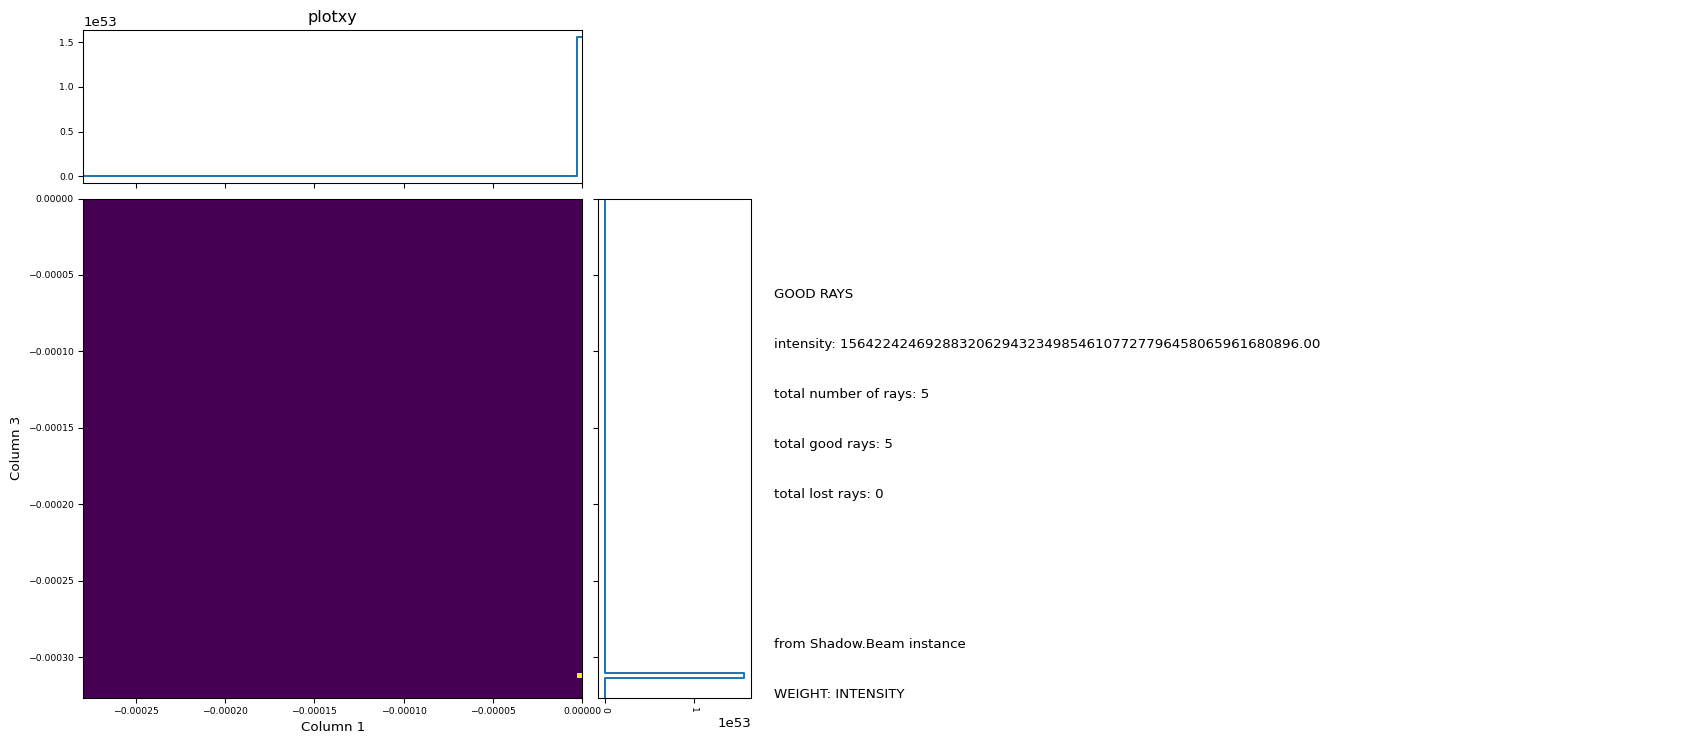

{'error': 1,
 'col_h': 1,
 'col_v': 3,
 'nolost': 1,
 'nbins_h': 100,
 'nbins_v': 100,
 'ref': 23,
 'xrange': [-0.0002793367467283701, 2.465734778415961e-19],
 'yrange': [-0.0003266660925704952, 2.1283314742547585e-10],
 'bin_h_edges': array([-2.79336747e-04, -2.76543379e-04, -2.73750012e-04, -2.70956644e-04,
        -2.68163277e-04, -2.65369909e-04, -2.62576542e-04, -2.59783174e-04,
        -2.56989807e-04, -2.54196440e-04, -2.51403072e-04, -2.48609705e-04,
        -2.45816337e-04, -2.43022970e-04, -2.40229602e-04, -2.37436235e-04,
        -2.34642867e-04, -2.31849500e-04, -2.29056132e-04, -2.26262765e-04,
        -2.23469397e-04, -2.20676030e-04, -2.17882662e-04, -2.15089295e-04,
        -2.12295928e-04, -2.09502560e-04, -2.06709193e-04, -2.03915825e-04,
        -2.01122458e-04, -1.98329090e-04, -1.95535723e-04, -1.92742355e-04,
        -1.89948988e-04, -1.87155620e-04, -1.84362253e-04, -1.81568885e-04,
        -1.78775518e-04, -1.75982150e-04, -1.73188783e-04, -1.70395416e-04,
     

In [6]:
pkjson.dump_pretty(beam_stats, filename='beam_stats.json')

import Shadow.ShadowTools
Shadow.ShadowTools.plotxy(beam, 1, 3, nbins=100, nolost=1)